# MTRS

In [2]:
import schemdraw
import schemdraw.elements as elm
import schemdraw.logic as lgc
import schemdraw.dsp as dsp

import matplotlib.pyplot as plt
import numpy as np
from wand.image import Image as WImage 
from wand.api import library
from ctypes import c_void_p, c_size_t
library.MagickSetCompressionQuality.argtypes = [c_void_p, c_size_t]

import os

In [3]:
class MeterP(elm.Element):
    def __init__(self, *args, **kwargs):
        super(MeterP, self).__init__(*args, **kwargs)
        self.segments.append(schemdraw.Segment([(0, 0), (2, 0)]))
        self.segments.append(schemdraw.Segment([(1, 1), (1, -1)]))
        self.segments.append(schemdraw.SegmentCircle((1, 0), .5))

        self.anchors['inp_amp'] = (0,0)
        self.anchors['out_amp'] = (2, 0)
        self.anchors['inp_vol'] = (1, 1)
        self.anchors['out_vol'] = (1, -1)

# Basiswissen

## SI-Einheiten

| Formelzeichen | Name        | Einheit |
|---------------|-------------|---------|
| s             | Länge       | m       |
| t             | Zeit        | s       |
| K             | Temperatur  | T       |
| I             | Stromstärke | A       |
| m             | Masse       | kg      |
|               | Stoffmenge  | mol     |  
|               | Lichtstärke | cd      |


## Einheiten Gleichungen

Come on  

Einheiten sollten am ende die richtige Einheit haben
    und man kann oft auch oft einfach Werte so zusammenwürfeln damit die Richtige Einheit rauskommt.  


## Geräteklassen

Genauigkeitsklasse gibt die Genauigkeit von Messgeräten  

Feinmessgeräten: unter $.5\%$
Betriebsmessgeräte: über $.5\%$

## relative- und absoluter Fehler


Relativer Fehler:  
Wert $\pm$ Fehler in Prozent  

Absoluter Fehler:  
Wert $\pm$ Fehler in Einheit von Wert

## Maßnahmen zur Fehlervermeidung

- Korrekte Verwendung  
- elektromagnetische Fehler vermeiden  
- richtige Messgeräte verwenden  
- Messgeräte Nullstellung kontrollieren  
- Messgeräte Regelmäßig eichen  
- im richtigen Temperaturbereich verwenden  
- Bei Analogen Messgeräten im oberen drittel des Bereichs Messen

## Übersicht über die Messfehler

### Systematische Fehler

Der Fehler wird vom systematischen schaltungstechnischen Aufbau bestimmt,
Durch die Analyse der Ursache des Fehlers, 
    ist der Fehler in Größe und Form bestimmbar  



### Dynamische Fehler

Nach dem Anlegen der Spannung entstehen Schwingungen 
Diese Schwingungen brauchen Zeit zum Ausschwingen,
    erreichen aber nie $0$.
Mann muss warten bis die Schwingung klein genug sind.
Hierzu legt man ein Fehlerband, von z.B. $3\%$, 
    sobald die Schwingungen in diesem Band sind kann man Messungen durchführen.  

Die Zeit zum Einschwingen nennt man "settling time"

### Parallaxe Fehler

Passiert beim Ablesen von analogen Messgeräten,  
    durch Abstand zwischen Zeiger und Messskala



## Fehlerfortpflanzung

### Addition  

$Z = X + Y = X_m + \Delta X + Y + \Delta Y = \left(X_m + Y_m\right) + \left(\Delta X + \Delta Y\right)$  
$Z = Z_m + \Delta Z$  

### Subtraktion  

$Z = X - Y = X_m + \Delta X - \left(Y + \Delta Y\right) = \left(X_m - Y_m\right) + \left(\Delta X - \Delta Y\right)$  
$Z = Z_m + \Delta Z$  

### Multiplikation

$Z = X\cdot Y = \left(X_m + \Delta X\right) \cdot \left(Y_m + \Delta Y\right)$  
$=\left(X_m \cdot Y_m\right) + \left(Y_m \Delta X + X \cdot \Delta Y\right) + \left(\Delta X \cdot \Delta Y\right)$  
$=\left(X_m \cdot Y_m\right) + \left(Y_m \Delta X + X \cdot \Delta Y\right) + \cancel{\left(\Delta X \cdot \Delta Y\right)}$  
$=\left(X_m \cdot Y_m\right) + \left(Y_m \Delta X + X \cdot \Delta Y\right) = Z_m + \Delta Z$


## AD/DA

### Quantisierungsfehler

Digitale Werte haben begrenzte Genauigkeit.  
Zum AD-Wandeln muss auf einen diskreten Wert gerundet werden,
    dabei geht Genauigkeit verloren

### Umsetzer-Kennlinien

# Messverfahren

## Analoges und Digitales Oszilloskop

## Leistungsmessung im 1-Phasen-System

Leistung $= U\cdot I$  

Bei verschiedenen Signalformen gilt immer: $P = U_{eff}\cdot I_{eff}$  
Nur je nach Signalform berechnen sich $U_{eff}$ und $I_{eff}$. 
Bei sinus:
- $U_{eff} = \frac{\hat{u}}{\sqrt{2}}$
- $I_{eff} = \frac{\hat{i}}{\sqrt{2}}$

### Strom-Richtige Messung

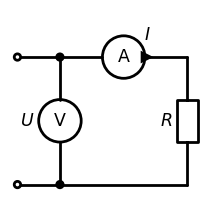

In [4]:
with schemdraw.Drawing() as d:
    #d += elm.Dot(open=True)
    d += elm.Line().right().length(1).dot().idot(open=True)
    an = d.here

    d += (amp := elm.MeterA().right())
    d += elm.CurrentLabelInline(amp).label('$I$').flip().reverse()

    d += elm.ResistorIEC().down().label('$R$')
    d += elm.Line().left().dot()

    d.push()
    d += (vm := elm.MeterV().to(an).label('$U$'))
    d.pop()
    d += elm.Line().left().length(1).dot(open=True)

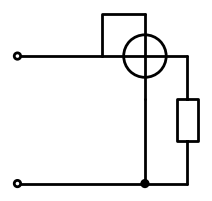

In [5]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line().right().length(2)
    d.push()
    d += (mp := MeterP())

    d.pop()
    d += elm.Wire('|-').to((mp.anchors['inp_vol'][0] + 2, mp.anchors['inp_vol'][1]))

    d.here = (mp.anchors['out_amp'][0]+2, mp.anchors['out_amp'][1])
    d += elm.ResistorIEC().down()

    d += elm.Line().left().length(1).dot()
    d.push()
    d += elm.Line().to((mp.anchors['out_vol'][0]+2, mp.anchors['out_vol'][1]))
    d.pop()

    d += elm.Line().left().dot(open=True)

$P_r = U\cdot I$ ... richtige Leistung

$P_a = U'\cdot I$ ... angezeigte Leistung

$P_a = (U_{st} + U)\cdot I = P_{st} + P_r$

- $U'$ ... Eingangsspannung
- $U_{st}$...Spannung am Leistungsmessgerät
- $U$... Spannung am Widerstand

$P = U\cdot I + I^2\cdot R_A$

$R_A$...Innenwiederstand des Amperemeters

### Spannungs-Richtig Messung

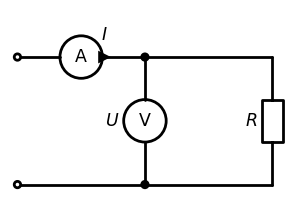

In [6]:
with schemdraw.Drawing() as d:
    #d += elm.Dot(open=True)

    d += (amp := elm.MeterA().right().dot().idot(open=True))
    d += elm.CurrentLabelInline(amp).label('$I$').flip().reverse()
    an = d.here
    d += elm.Line().right()

    d += elm.ResistorIEC().down().label('$R$')
    d += elm.Line().left().dot()

    d.push()
    d += elm.MeterV().to(an).label('$U$')
    d.pop()
    d += elm.Line().left().dot(open=True)

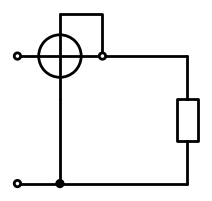

In [7]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += (mp := MeterP())

    d += elm.Wire('n').at(mp.anchors['out_amp']).to(mp.anchors['inp_vol'])

    d.here = mp.anchors['out_amp']
    d += elm.Dot(open=True)
    d += elm.Line().right().length(2)

    d += elm.ResistorIEC().down()
    d += elm.Line().left()

    d.push()
    d += elm.Line().to(mp.anchors['out_vol'])
    d.pop()
    d += elm.Line().left().length(1).idot().dot(open=True)

$I\cdot U$  ...richtige Leistung

$I'\cdot U$...angezeigte Leistung

$P_a = U\cdot(I_{sp} + I) = P_{sp} + P_r$


- $I'$ ... Eingangsstrom
- $I_{st}$...Strom durch Leistungsmessgerät
- $I$... Strom am Widerstand


$P = U\cdot I - \frac{U^2}{R_V}$

$R_V$...Innenwiederstand Voltmeter

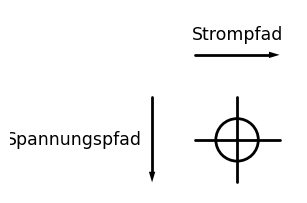

In [8]:
with schemdraw.Drawing() as d:
    d += (mp := MeterP())

    (vix, viy), (vox, voy) = mp.anchors['inp_vol'], mp.anchors['out_vol']
    (aix, aiy), (aox, aoy) = mp.anchors['inp_amp'], mp.anchors['out_amp']

    d += (elm.Line(arrow='->')
          .at((vix-2, viy))
          .to((vox-2, voy))
          .label('Spannungspfad'))

    d += (elm.Line(arrow='->')
          .at((aix, aiy + 2))
          .to((aox, aoy + 2))
          .label('Strompfad'))

### Leistungsarten

$P = U\cdot I\cdot (cos\varphi + i\cdot sin\varphi)$

$\varphi$ ist die Phasenverschiebung zwischen Spannung und Strom 
$\varphi = \varphi_u - \varphi_i$

### Wirkleistungsmessung

$P = U\cdot I \cdot cos \varphi$

Realteil der komplexen Leistung.

$P = \frac{1}{T}\cdot \int_0^T u(t)\cdot i(t) dt = U_{eff} \cdot I_{eff}\cdot cos\varphi$

- $u(t) = \hat{u}\cdot sin(\omega\cdot t + \varphi_u$
- $i(t) = \hat{i}\cdot sin(\omega\cdot t + \varphi_i$
- $U_{eff} = \frac{\hat{u}}{\sqrt{2}}$
- $I_{eff} = \frac{\hat{i}}{\sqrt{2}}$

### Blindleistunsmessung

$Q = U\cdot I \cdot cos \varphi$

Imaginärteil der komplexen Leistung.

$Q = U_{eff} \cdot I_{eff}\cdot sin\varphi$

- $u(t) = \hat{u}\cdot sin(\omega\cdot t + \varphi_u$
- $i(t) = \hat{i}\cdot sin(\omega\cdot t + \varphi_i$
- $U_{eff} = \frac{\hat{u}}{\sqrt{2}}$
- $I_{eff} = \frac{\hat{i}}{\sqrt{2}}$

Wir über $90°$ ($\pi~rad$) Phasenverschiebung gemessen.
Bspw. in Spannungspfad.

### Scheinleistungsmessung

Die Komplexe Leistung, zusammengesetzt aus Wirk- und Blindleistung

$S = P + j\cdot Q = |S| \cdot cos\varphi + j\cdot |S| \cdot sin\varphi$


$S^2 = P^2 + Q^2$

## Sensorik

### Passive Sensoren

Messgröße beeinflusst einen elektrischen Zustand bspw. Widerstand oder Kapazität  

| Sensor                                            | einwirkende Größe                     | beeinflusste Größe        |
|---------------------------------------------------|---------------------------------------|---------------------------|
|                                                   |                                       |                           |
| Thermometer                                       | Temperatur                            | ohmscher Widerstand       |
|Dehnungsmessstreifen                               | Längenänderung                        | ohmscher Widerstand       |
|Fotowiderstand                                     | Lichtstärke                           | ohmscher Widerstand       |
|                                                   |                                       |                           |
| Induktive Sensoren                                | Länge Winkel                          | Induktivität              |
| Kapazitive Sensoren                               | Länge, Winkel                         | Kapazität                 |

### Aktive Sensoren

Aktive Sensoren benötigen keine externe Energie und geben ein Signal und gibt Leistung an das Massglied ab.  

Oft nur Änderungen erkennbar, bc PHYSICS

| Sensor        | einwirkende Größe | beeinflusste Größe |
|---------------|-------------------|--------------------|
|               |                   |                    |
| Thermoelement | Temperatur        | Spannung           |
| Fotoelement   | Lichtstärke       | Spannung & Strom   |
| Piezokristall | Druck             | Ladung (Spannung)  |

### Temperatursensoren

In Wheatstone-Messbrücken eingesetzt

#### Platinsensoren

**Temperaturbereich:**  
- $\theta = [-200°C; 800°C]$
- $R_\theta = R_0\cdot(1 + \alpha_{Pt}\Delta \theta)$  

$\alpha_{Pt} = 3.9E-3 K^{-1}$  

$Pt100 \Rightarrow 100 \Omega$
$Pt1000 \Rightarrow 1000 \Omega$

#### Silizium-Sensor

VT:
- Geringe Kosten
- hoher Temperaturkoeffizient  

NT:
- nichtlinear
- kleiner Messbereich  

$R_{\theta} = R_0\cdot\left(1 + \alpha\Delta\theta + \beta\Delta\theta^2\right)$

KTY10: $R_{25} = 2000\Omega,\qquad\alpha_{25} = 7.37E-3 K^{-1}$

#### PTC Widerstand

PTC...Positive Temperature Coefficient, Kaltleiter  

**praktischer Bereich:**  
- $\alpha = [+7\frac{\%}{C}, +70\frac{\%}{C}]$
- $\theta = [-20°C; 200°C]$

#### NTC Widerstand

NTC...Negative Temperature Coefficient

$\alpha_N = \left[-2\frac{\%}{°C}; -6\frac{\%}{°C}\right]$  

$R_T = R_N\cdot e^{B\cdot\left( \frac{1}{T} - \frac{1}{T_N} \right)}$  

$T$...absolute Temperatur  
$B$...Materialkonstante  
$R_N$...Nennwiderstand bei Nenntemperatur $T_N$  

Messung wird über Widerstandsmessung gemacht  

#### Thermoelemente

Durch unterschiedliche Dehnung entsteht, durch *Seebeck-Effekt*, eine Spannung.  
Spannung ist Temperaturabhängig


VT:

- einfach
- weiter Temperaturbereich
- keine Selbstheizung (aktiver Sensor)  
- unabhängig von der Drahtgeometrie  
- Leitungswiederstände spielen kaum eine Rolle 

NT:
- kleine Spannungen  
- nichtlineare Kennlinie  
- aufwendige Kompensation  
- Ausgleichung erforderlich  
- manche Drähte sind schlecht verarbeitbar

##### Temperatur-Fixpunkt

zwei gleichartige Thermoelemente gegeneinander in Reihe.  
Bei gleicher Temperatur heben sich die Thermospannungen auf.  


Vergleichsstelle dient Wasser-Eis Thermospannung hängt dann nur vom Temperaturunterschied zwischen den Thermoelementen ab.  

##### Isothermal-Block  

Thermoelement Drahtpaar und misst die Differenz der Temperatur der Verbindungsstelle der beiden Metalle.  



### Spannungsabhängiger Widerstand

VDR...Voltage Dependent Resistor  

Geräte vor Überspannung zu Schützen  
VDR zeichnen sich durch starke Spannungsabhängigkeit. VDR schalten im ns-Bereich  

Im Grunde Spannung bleibt fast auf konstanten Wert.

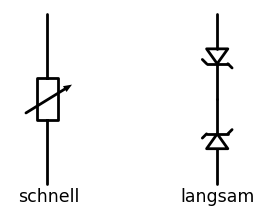

In [9]:
with schemdraw.Drawing() as d:
    tmp = d.here
    d += elm.ResistorVarIEC().down().reverse().length(4).label('schnell', 'L')

    d.here = tmp[0] + 4, tmp[1]
    d += elm.Zener().down().length(2)
    d += elm.Zener().down().reverse().length(2).label('langsam', 'L')

Mit steigender Spannung baut sich elektrisches Feld auf, welches die pn-Sperrschicht der Elementarzellen teilweise abbaut.  

$U = C\cdot I^{\beta}$  
$C = 15~ ...~ 5000\Omega$  
$\beta = 0.15...0.4 \text{Regelfaktor}$  

Der Regelfaktor zeigt fast keine Temperaturabhängigkeit.  

Bei VDR in Serie addieren sich die Spannungsabfälle. 
Bei Parallelschaltung können die Widerstände überlastet werden.  

**Anwendungen:**  
Spannungsbegrenzung ist notwendig wenn hohe Störspannungen auftreten können  
- SURGE - Blitzschlag ($\leq 2kV, \leq 100kHz, I\approx kA$)  
- BURST - geschaltete Induktivitäten ($2...8 kV, 100...200 MHz$)  
- ESD - statische Aufladung ($8~...~25 kV, \leq GHz$)  

**Funkenlöschung:**  
Spannungsspitzen ab $\approx 300V$ können Funken bilden.  
Abhilfe VDR parallel zum Kontakt  

### Fotowiderstand

LDR...Light Dependent Resistor  

Fotowiderstand ändert sich mit Beleuchtungsstärke  

Beste Form Mäanderform  

Geringer Elektronenabstand alle vom Licht freigesetzten Elektronen aufgenommen werden können. 


## Messbrücke

Allgemein:
$U_b = U_0 \cdot \left(\frac{R_2}{R_1 + R_2} - \frac{R_4}{R_4+R_3}\right)$

### Viertelbrücke

**Viertel**brücke $\Rightarrow$ 1 von 4 Widerständen änderbar

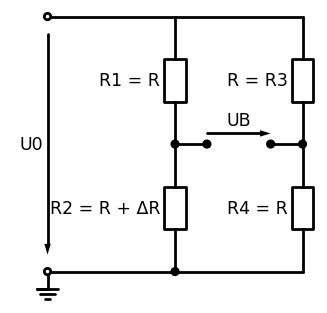

In [10]:
with schemdraw.Drawing() as d:
    d0 = d.add(elm.Dot(open=True))
    d += elm.Line()
    
    d.push()
    d += elm.ResistorIEC().down().label('R1 = R')
    d.push()
    
    d += elm.Dot()
    d += elm.Line().length(.75).right()
    d1 = d.add(elm.Dot())
    
    d.pop()
    d += elm.ResistorIEC().down().label('R2 = R + ΔR')
    
    d += (elm.Dot())
    d += elm.Line().left()
    de = d.add(elm.Dot(open=True))
    d += elm.Ground()
    
    d.pop()
    d += elm.Line()
    d += elm.ResistorIEC().down().label('R = R3')
    d += elm.Dot()
    d.push()
    
    d += elm.ResistorIEC().down().label('R4 = R')
    d += elm.Line().left()
    
    d.pop()
    d += elm.Line().length(.75).left()
    d2 = d.add(elm.Dot())
    
    d += (elm.Arrow()
        .at((d1.start[0], d1.start[1] + 0.25))
        .to((d2.start[0], d2.start[1] + 0.25))
        .label('UB'))
    d += (elm.Arrow()
          .at((d0.start[0], d0.start[1]-.4))
          .to((de.start[0], de.start[1]+.4))
          .label('U0'))

$U_B = U_{R2} - U_{R4} = U_0 \cdot \left( \frac{R_2}{R_1 + R_2} - \frac{R_4}{R_3 + R_4} \right)$  
$R_1 = R_3 = R_4 = R$  
$R_2 = R + \Delta R$  
$\therefore U_B = U_0 \cdot \frac{\Delta R}{4R + \Delta R} \approx U_0 \cdot \frac{\Delta R}{4R}$

### Halbbrücke

**Halb**brücke $\Rightarrow$ 2 von 4 Widerständen änderbar

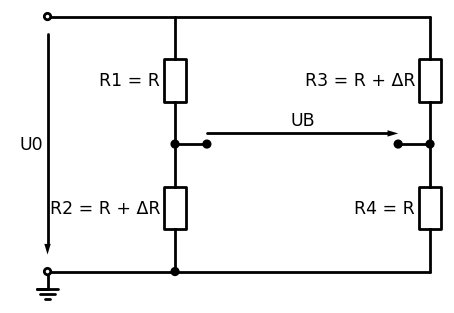

In [11]:
with schemdraw.Drawing() as d:
    d0 = d.add(elm.Dot(open=True))
    d += elm.Line()
    
    d.push()
    d += elm.ResistorIEC().down().label('R1 = R')
    d.push()
    
    d += elm.Dot()
    d += elm.Line().length(.75).right()
    d1 = d.add(elm.Dot())
    
    d.pop()
    d += elm.ResistorIEC().down().label('R2 = R + ΔR')
    
    d += (elm.Dot())
    d += elm.Line().left()
    de = d.add(elm.Dot(open=True))
    d += elm.Ground()
    
    d.pop()
    d += elm.Line().length(6)
    d += elm.ResistorIEC().down().label('R3 = R + ΔR')
    d += elm.Dot()
    d.push()
    
    d += elm.ResistorIEC().down().label('R4 = R')
    d += elm.Line().left().length(6)
    
    d.pop()
    d += elm.Line().length(.75).left()
    d2 = d.add(elm.Dot())
    
    d += (elm.Arrow()
        .at((d1.start[0], d1.start[1] + 0.25))
        .to((d2.start[0], d2.start[1] + 0.25))
        .label('UB'))
    d += (elm.Arrow()
          .at((d0.start[0], d0.start[1]-.4))
          .to((de.start[0], de.start[1]+.4))
          .label('U0'))

$U_B = U_{R2} - U_{R4} = U_0 \cdot \left( \frac{R_2}{R_1 + R_2} - \frac{R_4}{R_3 + R_4} \right)$  
$R_1 = R_4 = R$  
$R_2 = R_3 = R + \Delta R$  
$\therefore U_B = U_0 \cdot \frac{\Delta R}{2R}$
Doppelte Spannungsempfindlichkeit im Vergleich zur Viertelbrücke

### Vollbrücke

Alle Widerstände sind veränderbar
    und in der Form $R \pm \Delta R$,
    wobei $R_1$ und $R_2$ sowie $R_3$ und $R_4$ gegengleich sind

$U_B = U_0 \cdot \frac{\Delta R}{R}$

Wieder Doppelte Empfindlichkeit im Vergleich zur Halbbrücke

## Digitale Frequenzmessung

### Schaltung

d:\__HTL\Dipl\CompendiumMatura\venv\Lib\site-packages\schemdraw\backends\mpl.py:292: UserWarning: Glyph 9102 (\N{HYSTERESIS SYMBOL}) missing from current font.
  fig.savefig(output, format=ext, bbox_inches='tight')


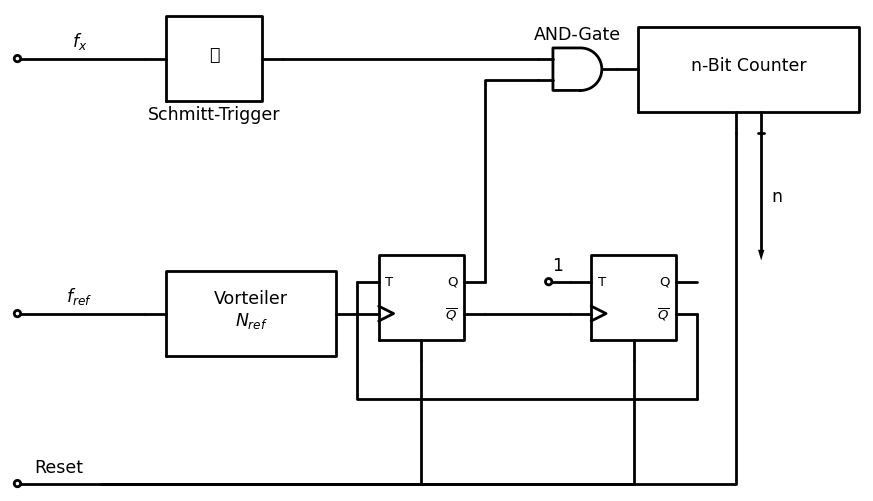

In [12]:
with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True).label('$f_x$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='inp'),
        elm.IcPin(side='right', anchorname='oup')
    ]).anchor('inp').drop('oup').label('Schmitt-Trigger', 'B').label('\u238e', 'center')

    d += elm.Line().length(6)
    d += (ACmp := lgc.And().anchor('in1').label('AND-Gate').drop('out'))

    d += (counter := elm.Ic(pins=[
        elm.IcPin(side = 'left', anchorname='in1'),
        elm.IcPin(side = 'bottom', anchorname='out1'),
        elm.IcPin(side = 'bottom', anchorname='out2')
    ], edgepadW=2).anchor('in1').label('n-Bit Counter', 'center').drop('out1'))

    d.here = (0, -6)
    d += elm.Line().idot(open=True).label('$f_{ref}$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='right', anchorname='out')
    ], edgepadW=2).label('Vorteiler\n$N_{ref}$').anchor('in1').drop('out')

    def t_ff():
        return elm.Ic(pins=[
            elm.IcPin('>', side='left'),
            elm.IcPin('T', side='left'),
            elm.IcPin('$\overline{Q}$', side='right', anchorname='nQ'),
            elm.IcPin('Q', side='right'),
            elm.IcPin(side='B', anchorname='res'),
        ])
    d += (ff1 := t_ff().anchor('>').drop('nQ'))
    d += elm.Line().right().length(2)
    d += (ff2 := t_ff().anchor('>').drop('nQ'))

    d += elm.Line().down().length(2)
    d += elm.Wire('-|').to(ff1.T)

    d += elm.Line().left().at(ff2.T).length(.5).dot(open=True).label('1')

    d += elm.Wire('|-').at(ff1.Q).to(ACmp.in2)

    d.here = (0, -10)
    d += elm.Line().idot(open=True).label('Reset').length(2)
    d.push()

    d += elm.Wire('-|').to(ff1.res)
    d.pop(); d.push()
    d += elm.Wire('-|').to(ff2.res)
    d.pop(); d.push()
    d += elm.Wire('-|').to(counter.out1)

    d += elm.Line(arrow='|->').at(counter.out2).down().label('n', 'bottom')

### Spannungsdiagramme

![](mtrs_media/Uf_diags.png)

### Berechnung der relevanten Größe

$N = f_x \cdot T_{ref}$

$f_x = \frac{T_{ref}}{N}$

## Digitale Periodendauermessung

### Schaltung

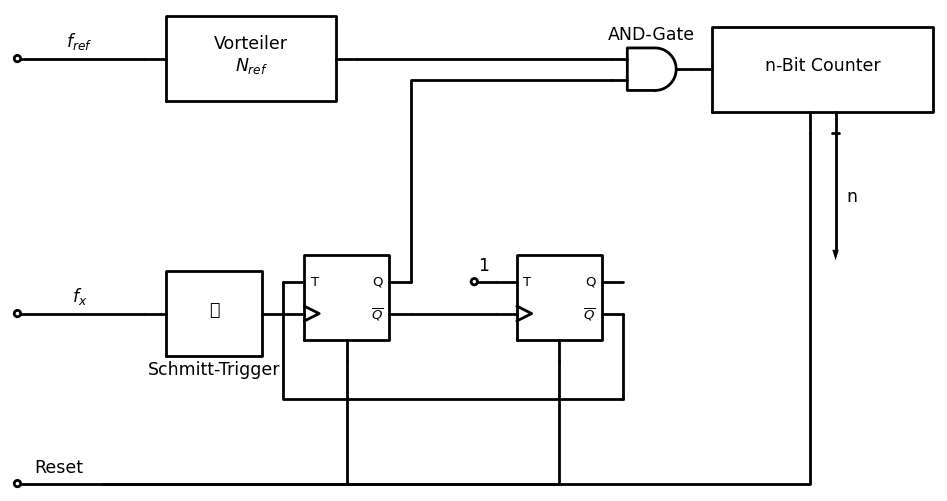

In [13]:

with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True).label('$f_{ref}$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='right', anchorname='out')
    ], edgepadW=2).label('Vorteiler\n$N_{ref}$').anchor('in1').drop('out')

    d += elm.Line().length(6)
    d += (ACmp := lgc.And().anchor('in1').label('AND-Gate').drop('out'))

    d += (counter := elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='bottom', anchorname='out1'),
        elm.IcPin(side='bottom', anchorname='out2')
    ], edgepadW=2).anchor('in1').label('n-Bit Counter', 'center').drop('out1'))

    d.here = (0, -6)

    d += elm.Line().idot(open=True).label('$f_x$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='inp'),
        elm.IcPin(side='right', anchorname='oup')
    ]).anchor('inp').drop('oup').label('Schmitt-Trigger', 'B').label('\u238e', 'center')

    def t_ff():
        return elm.Ic(pins=[
            elm.IcPin('>', side='left'),
            elm.IcPin('T', side='left'),
            elm.IcPin('$\overline{Q}$', side='right', anchorname='nQ'),
            elm.IcPin('Q', side='right'),
            elm.IcPin(side='B', anchorname='res'),
        ])


    d += (ff1 := t_ff().anchor('>').drop('nQ'))
    d += elm.Line().right().length(2)
    d += (ff2 := t_ff().anchor('>').drop('nQ'))

    d += elm.Line().down().length(2)
    d += elm.Wire('-|').to(ff1.T)

    d += elm.Line().left().at(ff2.T).length(.5).dot(open=True).label('1')

    d += elm.Wire('|-').at(ff1.Q).to(ACmp.in2)

    d.here = (0, -10)
    d += elm.Line().idot(open=True).label('Reset').length(2)
    d.push()

    d += elm.Wire('-|').to(ff1.res)
    d.pop()
    d.push()
    d += elm.Wire('-|').to(ff2.res)
    d.pop()
    d.push()
    d += elm.Wire('-|').to(counter.out1)

    d += elm.Line(arrow='|->').at(counter.out2).down().label('n', 'bottom')


### Spannungsdiagramme

![](mtrs_media/Uf_diags_inv.png)

### Berechnung der relevanten Größe

$N = T_x \cdot f_{ref}$


$T_x = \frac{f_{ref}}{N}$

## Digitale Phasenverschiebung-Messung

**Anforderungen**:
- $f_1 = f_2 = const$
- Gleichanteil = 0
    HP am Eingang
- gleiche Signalform

### Schaltung

![](mtrs_media/dphi_cir.png)

### Spannungsdiagramme

![](mtrs_media/dphi_diags.png)

### Berechnung der relevanten Größe

$N = f_{ref}\cdot \Delta t\Rightarrow \Delta t = \frac{N}{f_{ref}}$  

$\varphi = \frac{\Delta t}{T}\cdot 360° = \frac{N}{f_{ref}\cdot T}\cdot 360°$

## U-f Umsetzer

### Schaltung

![](mtrs_media/uf_cur_real.png)

### Spannungsdiagramme

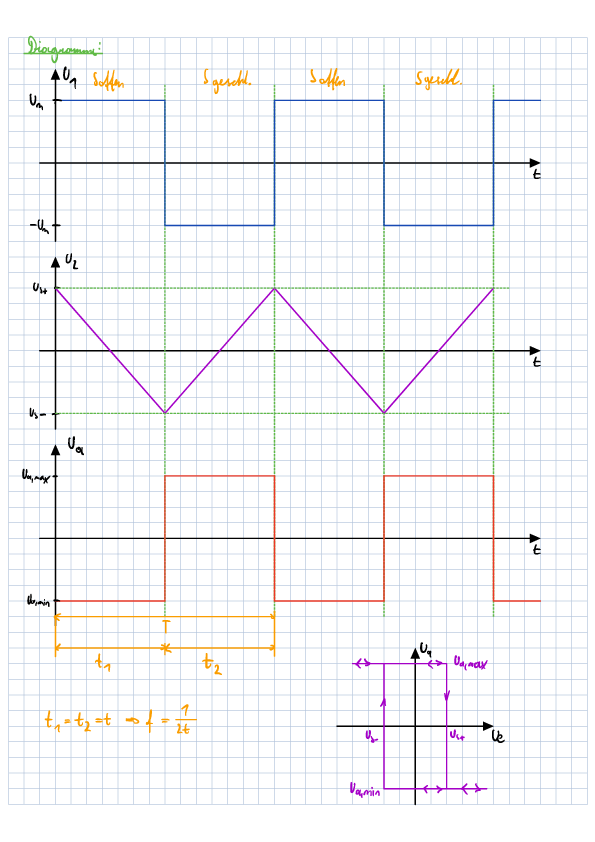

In [14]:
WImage(filename=os.path.join(os.getcwd(), 'mtrs_media', 'uf_diags_real.pdf[0]'))

### Berechnung der relevanten Größe

$f = \frac{1}{T} = \frac{1}{2t} = \frac{U_m}{4R_4 C \alpha U_{a, max}}$

### Anwendungsbeispiele

## DMS-Messbrücke

### Schaltungen


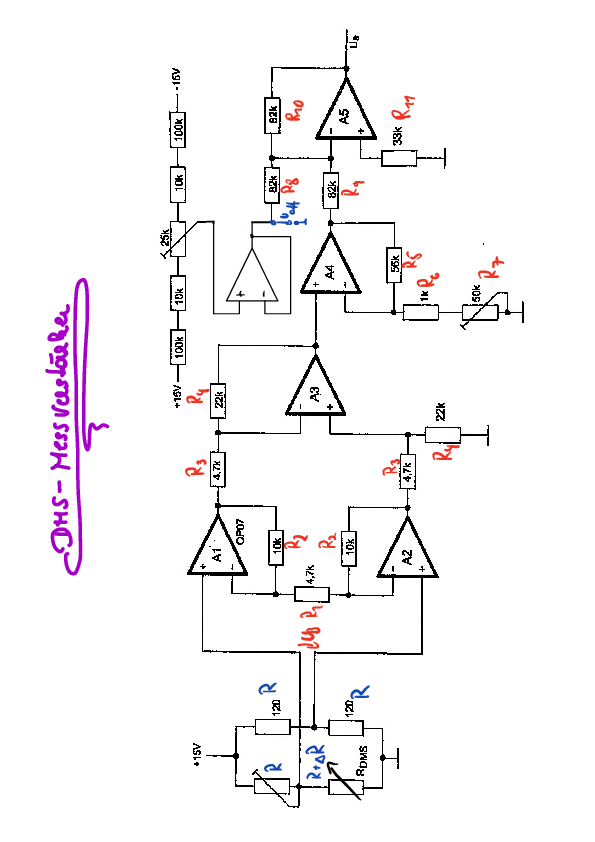

In [15]:
#WImage(filename=os.path.join(os.getcwd(), 'mtrs_media', 'dms_cir.pdf'))

WImage(filename="mtrs_media/dms_cir.pdf[0]")

### OPV-Verstärkerschaltung

![](mtrs_media/differential_amp.png)

### Berechnung/Herleitung der Ausgangsgröße

$U_{1} = U_B = U_{e2} - U_{e1} \wedge$

$I_{12} = \frac{U_1}{R_1} = \frac{U_{Diff}}{R_1 + 2R_2}\wedge$

$U_a = (U'_{e1} - U'_{e2}) \Rightarrow U_a = U_diff$

$\therefore U_a = \left(1 + \frac{2R_2}{R_1}\right)\cdot (U_{e2} - U_{e2})$...Differenz der Potentiale zwischen 2 Punkten

### Biasstromkompensation

OPVs sind nicht ideal ( Eingangsströme ) beeinflussen die Verstärkung deshalb Kompensation durch extra Schaltung.

# Signalaufbereitung

## Digitale Verarbeitungskette

### Anti Aliasing Filter

Um zu verhindern, dass das Abtasttheorem verletzt wird, werden Anti-Aliasing Filter verwendet.
Diese verhindern, 
    dass die Signalfrequenz höher ist als die Maximal erlaubte

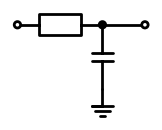

In [16]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().length(2).idot(open=True).dot()
    d.push()
    d += elm.Capacitor().down().length(1.5)
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1).dot(open=True)

### S&H Glied

Für die AD-Umwandlung muss das Eingangssignal konstant Gehalten werden. 
Dafür werden **S**ample und **H**old Glieder verwendet

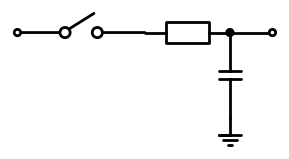

In [17]:
with schemdraw.Drawing() as d:
    d += elm.Switch().idot(open=True)
    d += elm.ResistorIEC().length(2).dot()
    d.push()
    d += elm.Capacitor().down().length(2)
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1).dot(open=True)

### Abtasttheorem

Die Abtastfrequenz muss mindestens doppelt so hoch sein wie die Signalfrequenz.

Wenn das Abtasttheorem verletzt wird, 
    so werden die hohen Frequenzanteile als niedrigere aufgefasst,
    welche das Signal verzerren

### Umsetzungskennlinien

## AD-Wandler

### Sukzessive Approximationsverfahren

#### Schaltung

In [18]:
SAR = elm.Ic(pins=[
        elm.IcPin(side='top', anchorname='SH'),
        elm.IcPin(name='Start', side='top'),
        elm.IcPin(name='Reset', side='top'),
        elm.IcPin(anchorname='in', side='left'),
        elm.IcPin(name='Finished', side='right'),
        elm.IcPin(anchorname='out', side='bottom')
    ],
    edgepadW= .5,
    pinspacing=1
).label('SAR', 'center')
#display(SAR)

In [19]:
DA_conv = elm.Ic(
    pins=[
        elm.IcPin(side='left', name='in'),
        elm.IcPin(side='right', name='out'),
        elm.IcPin(side='top', anchorname='ref')
    ],
    edgepadW = 2
).label('DA-Wandler', 'center')
#display(DA_conv)

In [20]:
SH = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='right', anchorname='out'),
        elm.IcPin(side='top', anchorname='trigger')
    ]
).label('S and H', 'center')
#display(SH)

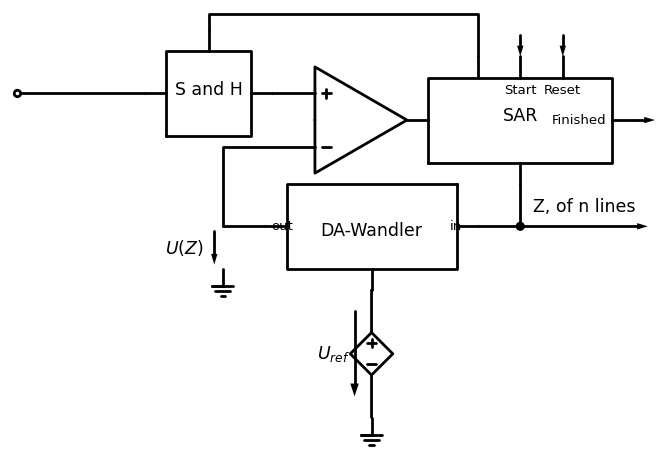

In [21]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line()
    d += SH.anchor('in').drop('out')
    d += elm.Line().length(1)
    d += (cmp := elm.Opamp().flip().anchor('in2'))
    d += SAR.anchor('in')
    d.here = SAR.out
    d += elm.Line().down().length(1)
    d.push()
    d += elm.Line().left().length(1)
    d += DA_conv.anchor('in')
    d += elm.Line().at(DA_conv.out).left().length(1)
    
    d.push()
    d += (g1 := elm.Ground().at((d.here[0], d.here[1]-1)))
    d.pop()
    d.push()
    d += (elm.Line(arrow='->').at((d.here[0]-.2, d.here[1]-.1)).to((d.here[0]-.2, g1.start[1]+.1))
          .label('$U(Z)$'))
    d.pop()
    d += elm.Wire('|-').to(cmp.in1)
    
    d.pop()
    d += elm.Dot()
    d += elm.Line(arrow='->').right().label('Z, of n lines')
    
    
    d += elm.Wire('n').at(SAR.SH).to(SH.trigger)
    
    d += elm.Line(arrow='->').at(SAR.Finished).right().length(.5)
    d += elm.Line(arrow='<-').at(SAR.Start).up().length(.5)
    d += elm.Line(arrow='<-').at(SAR.Reset).up().length(.5)
    
    d += (ref := elm.SourceControlledV().reverse()
          .at(DA_conv.ref).down())
    d += elm.CurrentLabel().reverse().at(ref).label('$U_{ref}$')
    d += elm.Ground()

#### Funktionsprinzip

1. Die Bits des SAR (**S**ukkzessive ***A**pprox **R**egister) sind alle auf 0
    Man hat einen Zeiger auf ein Bit, 
        welches am Anfang auf das **MSB** zeigt.
2. Das Bit des Zeigers wird auf 1 gesetzt,
3. Über einen DA-Wandler wird der Ausgang wieder zu einer analogen Spannung gewandelt.
4. Wenn die Spannung nun größer als die Eingangsspannung ist,
    wird das Bit wieder auf 0 gesetzt
   Ansonsten bleibt es auf 1.  
5. Wenn der Zeiger noch nicht das **LSB** erreicht hat,
       geht er um eine stelle zum nächsten weniger Werten Bit.
   Wenn der Zeiger das LSB erreicht hat, 
       so ist die Wandlung beendet und das *Finished*-Flag wird auf 1 gesetzt
       
Laufzeit: $O(log~n)$

#### Diagramme

Beispiel mit n=4 Bit und $U_e = 10.7V$, der Wert des LSB Beträgt $1V$ (MSB=> $8V$)

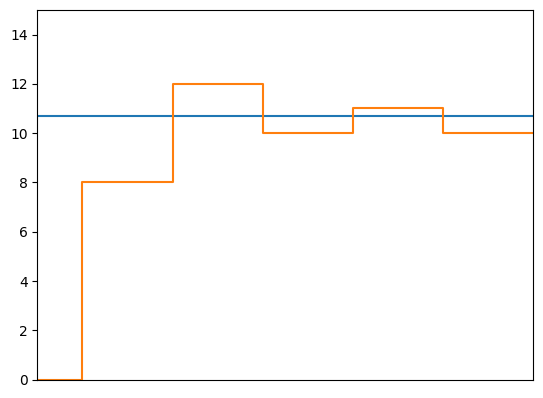

In [22]:
plt.figure(1)
plt.plot([-.1, 1], [10.7, 10.7])
plt.plot([-.1, 0,
         0, 0.2,
         0.2, .4,
         .4, .6,
         .6, .8,
         .8, 1],
        [0, 0,
        8, 8,
        12, 12,
        10, 10,
        11, 11,
        10, 10])

plt.xlim([-.1, 1])
plt.ylim([0, 15])
plt.xticks([])
plt.show()

#### Herleitungen

$U(z) = U_{ref}\cdot\frac{t}{t_{max} +1}\cdot U_e$  
$Z = \frac{Z_{max} + 1}{U_{ref}} \cdot U_e$

### Single Slope:

#### Schaltung

![](mtrs_media/single_slope_cir.png)

*Bei uns S&H Glied am Eingang*
*= kann bei uns ein \& sein*

#### Funktionsprinzip

- Es wird ein Sägezahn mit dem Eingang und mit Ground verglichen.
- Wenn der Sägezahn größer 0 ist und kleiner als das Eingangssignals 
    so ist das Und Gatter der Beiden Komparatoren HIGH.
  Durch ein UND Gatter mit einem Clock Signal, 
    wird dieses nur in diesen Zeitraum durchgelassen.
- Bei jeder durchgelassenen Clock-Flanke zählt ein Counter nach oben.

#### Diagramme

''

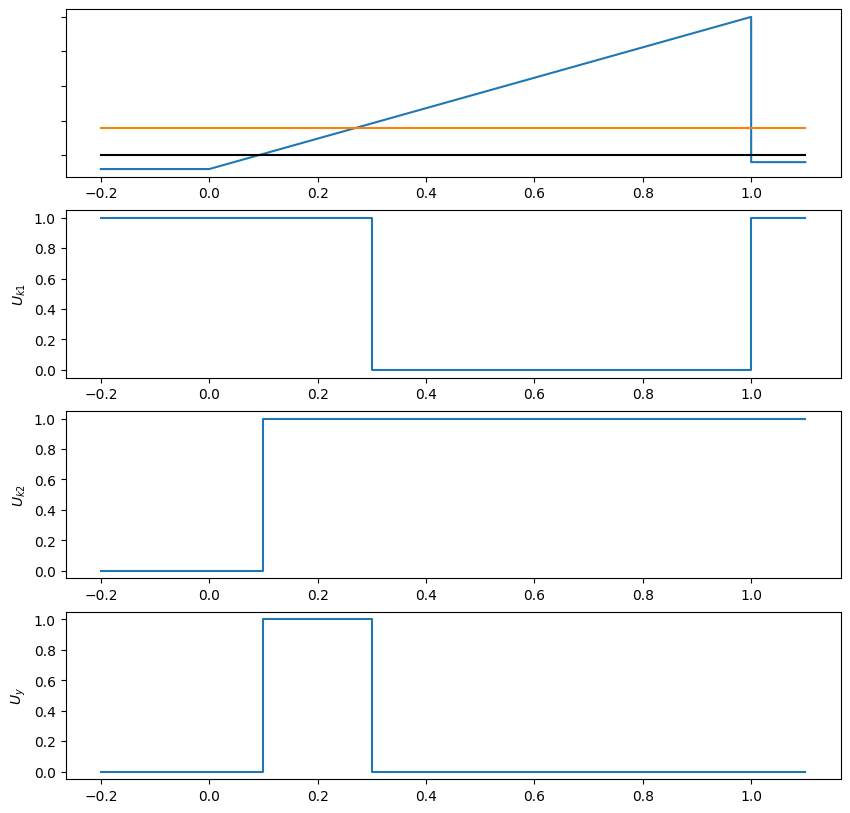

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

fig.set_size_inches(10, 10)

ax1.plot([-.2, 0, 1, 1, 1.1], [-1, -1, 10, -.5, -.5])
ax1.plot([-.2, 1.1], [2, 2])
ax1.plot([-.2, 1.1], [0, 0], color='black')
ax1.set_yticklabels([])

ax2.plot([-.2, .3, .3, 1, 1, 1.1], [1, 1, 0, 0, 1, 1])
ax2.set_ylabel('$U_{k1}$')

ax3.plot([-.2,.1 ,.1, 1.1], [0, 0, 1, 1])
ax3.set_ylabel('$U_{k2}$')

ax4.plot([-.2, .1, .1, .3, .3, 1.1], [0, 0, 1, 1, 0, 0])
ax4.set_ylabel('$U_y$')
;

#### Herleitungen

$N = \Delta t \cdot f_{clk}$

### Dual Slope:

#### Schaltung

![](mtrs_media/dual_slope_cir.png)

#### Funktionsprinzip

- Es wird nach der Eingangsspannung invers für die Zeit $t_1$ Integriert
- Danach wird nach einer Referenzspannung nach oben integriert ($-$\&$-$ $\Rightarrow~~+$)
- Während des 2. Integrierens zählt ein Counter nach oben,
    dieser Vorgang wird abgebrochen, wenn der Integrierte Wert $~0$ erreicht (Komparator)

**WICHTIG:** $t_1$ ist konstant 

Da die Flächen gleich sind, fallen die $RC$ Komponenten weg, wodurch man nicht von Bauteildriften betroffen ist.

#### Diagramme

![](mtrs_media/dual_slope_diag.png)

#### Herleitungen

Die Fläche unter beiden Analogwerten ist gleich.

$-\frac{1}{RC} \int_0^{t_1} U_e dt = -\frac{1}{RC} \int_{t_1}^{t_2 + t_1} U_{ref}dt$  
$U_e\cdot t_1 = U_{ref}\cdot t_1 + U_{ref}\cdot t_2 - U_{ref}\cdot t_1$  
$U_e\cdot t_1 = U_{ref} \cdot t_2$  
$t_1 = 2^n\cdot T_{clk} \wedge t_2 \cdot Z\cdot T_{clk}$  
$U_e \cdot 2^n \cdot T_{clk} = U_{ref}\cdot Z \cdot T_{clk}$  
$Z = \frac{U_e}{U_{ref}} \cdot (Z_{max} + 1)$

### Zählverfahren

#### Schaltung

In [24]:
DA_conv = elm.Ic(
    pins=[
        elm.IcPin(side='left', name='in'),
        elm.IcPin(side='right', name='out'),
        elm.IcPin(side='top', anchorname='ref')
    ],
    edgepadW = 2
).label('DA-Wandler', 'center')

In [25]:
SH = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='right', anchorname='out'),
    ]
).label('S and H', 'center')

In [26]:
counter = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='bottom', anchorname='out'),
        elm.IcPin(name='clk<', side='right', anchorname='clk'),
        elm.IcPin(name='reset', side='top')
    ], edgepadW=2.25
).label('n-bit counter', 'center')
#display(counter)

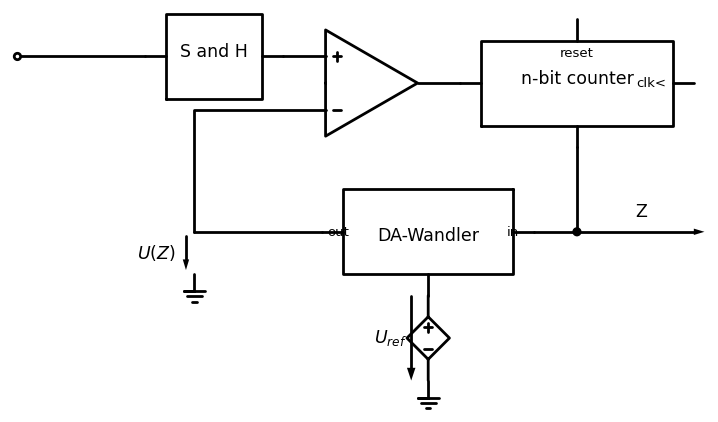

In [27]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line()
    d += SH.anchor('in').drop('out')
    d += elm.Line().length(1)
    d += (cmp := elm.Opamp().anchor('in2').flip())
    d += elm.Line().length(1)
    
    d += counter.anchor('in')
    d += elm.Line().at(counter.out).down().length(2)
    d.push()
    d += elm.Line().left().length(1)
    d += DA_conv.anchor('in').drop('out')
    d += elm.Line().left()
    
    d.push()
    d += (g1 := elm.Ground().at((d.here[0], d.here[1]-1)))
    d.pop()
    d.push()
    d += (elm.Line(arrow='->').at((d.here[0]-.2, d.here[1]-.1)).to((d.here[0]-.2, g1.start[1]+.1))
          .label('$U(Z)$'))
    d.pop()
    d += elm.Wire('|-').to(cmp.in1)
    
    d += (ref := elm.SourceControlledV().reverse()
          .at(DA_conv.ref).down().length(2))
    d += elm.CurrentLabel().reverse().at(ref).label('$U_{ref}$')
    d += elm.Ground()
    
    d.pop()
    d += elm.Dot()
    d += elm.Line(arrow='->').right().label('Z')

#### Funktionsprinzip

Solange der DA gewandelte wert von Z kleiner als U_e ist (Komparator gibt $0$ aus),
    zählt der Counter nach oben.
Wenn der Wert größer als U_e ist (Komparator gibt $0$ aus).
    so zählt der Counter nach unten.
    Laufzeit: $O(2^n)$
    
Wenn sich der Eingang um weniger als $U_{LSB}\cdot f_{clk} \equiv \frac{[V]}{[s]}$ ändert,
    so kann das S\&H Glied weggelassen werden.
Dadurch folgt der Ausgangswert dem Eingangswert.

#### Diagramme

''

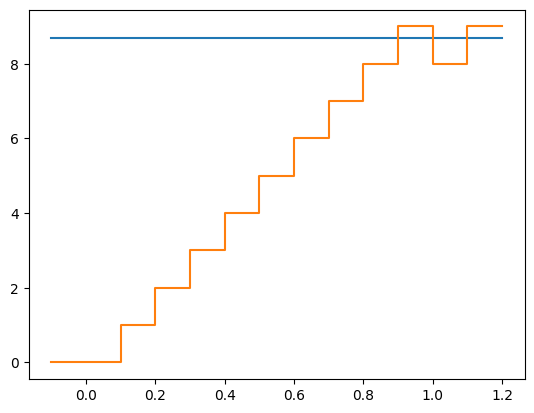

In [28]:
fig, ax = plt.subplots(1,1)
ax.plot([-.1, 1.2], [8.7, 8.7])

ax.plot([
    -.1, .1,
    .1, .2,
    .2, .3,
    .3, .4,
    .4, .5,
    .5, .6,
    .6, .7,
    .7, .8,
    .8, .9,
    .9, 1,
    1, 1.1,
    1.1, 1.2 
],[
    0, 0,
    1, 1,
    2, 2,
    3, 3,
    4, 4, 
    5, 5,
    6, 6,
    7, 7,
    8, 8,
    9, 9,
    8, 8,
    9, 9
])
;

## DA-Wandler

### R2R-Netzwerk

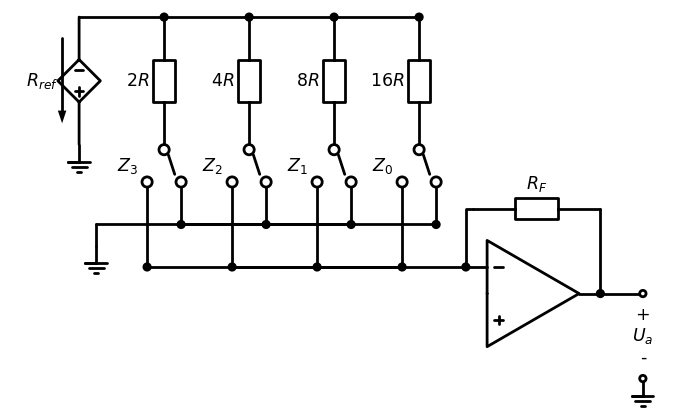

In [29]:
with schemdraw.Drawing() as d:
    d.push()
    d += (ref := elm.SourceControlledV().down())
    d += elm.CurrentLabel().reverse().at(ref).label('$R_{ref}$')
    d += elm.Ground()
    d.pop()
    
    zs = []
    N = 4
    for i in range(N-1, -1, -1):
        d += elm.Line().dot().length(2)
        d.push()
        nr = 2**(N-i)
        d += elm.ResistorIEC().down().label(f'${nr}R$')
        d += (z := elm.SwitchSpdt2().down().label(f'$Z_{i}$'))
        zs.append(z)
        d.pop()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.b).down().dot().length(1)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Line().left().length(2)
    d += elm.Line().down().length(.5)
    d += elm.Ground()
    
    zs.reverse()
    prev = None
    for z in zs:
        d += elm.Line().at(z.c).down().dot().length(2)
        if not prev:
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    
    d += elm.Line().length(1.5).dot()
    loop = d.here
    d += elm.Line().length(.5)
    d += (amp := elm.Opamp().anchor('in1'))
    d += elm.Line().length(.5).dot()
    
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_F$')
    d += elm.Wire('-|').to(loop)
    d.pop()
    
    d += elm.Line().length(1)
    d += elm.Dot(open=True)
    d += elm.Gap().down().label(('+', '$U_a$','-')).length(2)
    d += elm.Dot(open=True)
    d += elm.Ground()

### Prinzip der gewichteten Ströme

Nach Überlagerungs-Prinzip Summe von jeden einzelnen Pfad.

$U_a = -U_{ref}\cdot \left(Z_3\cdot\frac{R_F}{2R} + Z_2\cdot\frac{R_F}{4R} + Z_1\cdot\frac{R_F}{8R} + Z_0\cdot\frac{R_F}{16R}\right)$  
$U_a = -U_{ref} \cdot \frac{R_F}{16R}\cdot (8\cdot Z_3 + 4\cdot Z_2 + 2 \cdot Z_1 + Z_0)$  
In dieser Form gut einsehbar, jeder Schalter repräsentiert ein Bit.  
$\forall Z_i \in \{0, 1\}$  
$U_a = -U_{ref} \cdot\frac{R_F}{16R}\cdot Z = -U_{ref}\cdot\frac{R_F}{R}\cdot \frac{Z}{Z_{max}  +1}$

Strom ist unabhängig von Z.  
$I'  = U_{ref} \cdot \frac{Z}{Z_{max} + 1}\cdot \frac{1}{R}$  
$I'' = \frac{U_{ref}}{R}\cdot \frac{Z_{max} - Z}{Z_{max} + 1}$

$I = I' + I''$  
nicht von $Z$ abhängig

### Inverses R2R-Netzwerk

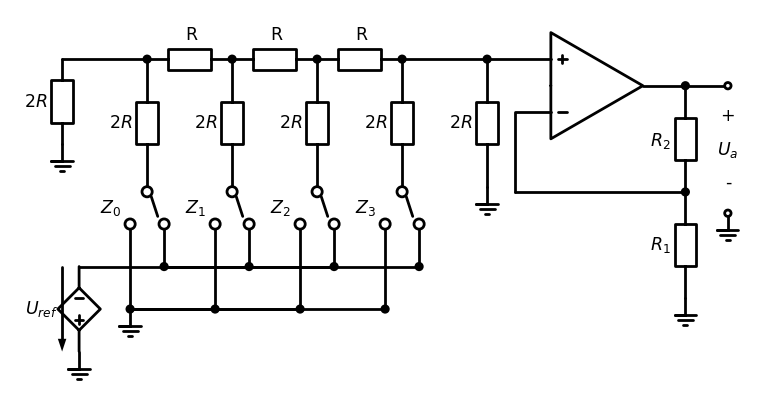

In [30]:
with schemdraw.Drawing() as d:
    d.push()
    d += elm.ResistorIEC().down().length(2).label('$2R$')
    d += elm.Ground()
    d.pop()
    
    zs = []
    N = 4
    for i in range(N):
        if not (i == 0):
            d += elm.ResistorIEC().dot().length(2).label('R')
        else:
            d += elm.Line().dot().length(2)
        d.push()
        d += elm.ResistorIEC().down().label(f'$2R$')
        d += (z := elm.SwitchSpdt2().down().label(f'$Z_{i}$'))
        zs.append(z)
        d.pop()
    d.push()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.b).down().dot().length(1)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Line().left().length(2)
    d += (ref := elm.SourceControlledV().down().length(2))
    d += elm.CurrentLabel().at(ref).reverse().label('$U_{ref}$')
    d += elm.Ground()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.c).down().dot().length(2)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Ground()
    
    d.pop()
    d += elm.Line().length(2).dot()
    d.push()
    d += elm.ResistorIEC().down().label('$2R$')
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1.5)
    d += (amp := elm.Opamp().anchor('in2').flip())
    d += elm.Line().at(amp.out).length(1).dot()
    
    d.push()
    d += elm.ResistorIEC().down().length(2.5).dot().label('$R_2$')
    d.push()
    d += elm.Line().left().length(4)
    d += elm.Wire('|-').to(amp.in1)
    d.pop()
    
    d += elm.ResistorIEC().down().length(2.5).label('$R_1$')
    d += elm.Ground()
    d.pop()
    d += elm.Line().length(1)
    d += elm.Gap().down().label(('+', '$U_a$', '-')).dot(open=True).idot(open=True)
    d += elm.Ground()

Bei Überlagerung alle Werte bis zum Schalter kollabieren zu 2R

Durch Teilung danach,
    $\varphi_+ = Z_3 \cdot \frac{U_{ref}}{3} + Z_2 \cdot \frac{U_{ref}}{6} + Z_1 \cdot \frac{U_{ref}}{12} + Z_0 \cdot \frac{U_{ref}}{24}$  
$\varphi_+ = \frac{U_{ref}}{24} \cdot (8 \cdot Z_3 + 4 \cdot Z_2 +  2 \cdot Z_1 + Z_0)$   
$\varphi_+ = \frac{U_{ref}}{24}\cdot Z = \frac{16}{16}\cdot \frac{U_{ref}}{24}\cdot Z$  

$U_a = \frac{U_{ref}}{3}\cdot \frac{Z}{Z_{max}} \cdot \left(1 + \frac{R_2}{R_1} \right)$

# Industrielle Anwendung

## Bustopologie und Zugriffsverfahren

### Bustopologievarianten

- Stern
- Ring
- Peer-To-Peer
- Bus
- Baum

### Master-Slave-Prinzip

In einem Netzwerk gibt es einen oder mehrere Teilnehmer (Master), welche die anderen Teilnehmer ansprechen 
    und den Datenaustausch steuern.

### CSMA/CD

Hier wird ein Störsignal ausgesendet sobald eine Kollision entdeckt wurde.
Alle Teilnehmer stoppen zu senden und berechnen sich Zufallszahlen,
    welche bestimmen wie lange sie warten bis sie wieder versuchen die Nachricht zu versenden.

Deshalb ist diese Art **nicht** Deterministisch!

### CSMA/CA

Hier bekommt jeder Teilnehmer eine Adresse, 
    je nach der Wertigkeit diese Adresse wird bestimmt wer senden darf.
Denn sobald ein Teilnehmer auf diese Leitung überschrieben wird, so schaltet sich dieser weg.

''

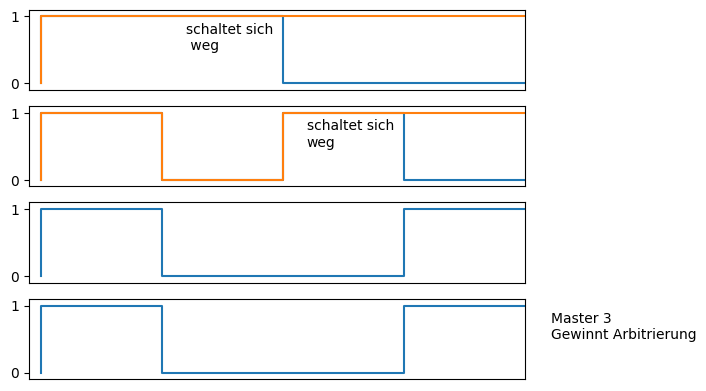

In [31]:
fig, axs = plt.subplots(4, 1)

for ax in axs:
    ax.set_yticks([1, 0])
    ax.set_xticks([])
    ax.set_ylim([-.1, 1.1])
    ax.set_xlim([-0.1, 4])

(ax1, ax2, ax3, ax4) = axs

# 1, 1,#0, 0,
# 1, 0, 1,#1
# 1, 0, 0, 1

ax1.plot(
    [0, 0, 1, 1, 2, 2, 3, 3, 4],
    [0, 1, 1, 1, 1, 0, 0, 0, 0]
)
ax1.plot(
    [0, 0, 1, 1, 2, 2, 3, 3, 4],
    [0, 1, 1, 1, 1, 1, 1, 1, 1]
)
ax1.text(1.2, .5, 'schaltet sich \n weg')
ax2.plot(
    [0, 0, 1, 1, 2, 2, 3, 3, 4],
    [0, 1, 1, 0, 0, 1, 1, 0, 0]
)
ax2.plot(
    [0, 0, 1, 1, 2, 2, 3, 3, 4],
    [0, 1, 1, 0, 0, 1, 1, 1, 1]
)
ax2.text(2.2, .5, 'schaltet sich \nweg')
ax3.plot(
    [0, 0, 1, 1, 2, 2, 3, 3, 4],
    [0, 1, 1, 0, 0, 0, 0, 1, 1,]
)

ax4.plot(
    [0, 0, 1, 1, 2, 2, 3, 3, 4],
    [0, 1, 1, 0, 0, 0, 0, 1, 1]
)
ax4.text(4.22, .5, 'Master 3 \nGewinnt Arbitrierung')
;

### Wired-AND

Die Ausgänge sind Open-Collectors und die Leitung wird auf HIGH gezogen.
Sobald nun mindestens ein Teilnehmer die Leitung auf LOW ziehen möchte geht die Leitung auf LOW.  

Somit müssen alle Teilnehmer HIGH schreiben wollen damit auch HIGH auf die Leitung geschrieben wird, 
Diese Eigenschaft führt dazu, dass wenn ein Teilnehmer überschrieben wird,
    sich dieser wegschaltet und somit CSMA-CA ermöglicht.

## Serielle Schnittstelle

### RS232

#### Eigenschaften  

- Ruhepegel: HIGH
    |      | RS232          | UART |
    |------|----------------|------|
    | LOW  | $~+3~...~+15V$ | $0V$ |
    | HIGH | $-3~...~-15V$  | $5V$ |

- 5-8 Datenbits  
    LSB als erstes  
    MSB als letztes 
- 0-1 Paritätsbit  
    EVEN oder ODD
- 1, 1.5, 2 Stop Bits
    Ruhephase bis zur nächsten Datenübertragung  

Baudrate = $Bit/s$  
bei RS232 vielfaches von $150$  



### Störeinflüsse

#### Gleichtaktstörung  

Bei kapazitiver Störung wird das Potential verändert
Bei differentialer Datenübertragung werden beide Leitungen beinahe gleich gestört 
    und die Potentialdifferenz bleibt nahezu gleich  

#### Induktive Störung  

Durch Leitungsschleifen treten induktive Störungen auf. 
Wenn die Leitung verdrillt wird (twisted pair), so gibt es mehrere kleinere Felder,
    welche ein gegengleiches Vorzeichen und somit die induktive Störung minimal halten.

### Differenzielle Datenübertragung

Es wird nicht das Potenzial der Leitung gemessen, 
    sondern die Potentialunterschied zwischen zwei Leitungen.  
Am Empfänger wird das Signal dekodiert (Optokoppler)

## MAX-232-Ladungspumpenprinzip

### Ladungspumpe

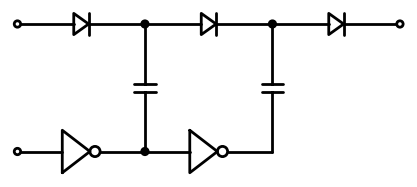

In [32]:
with schemdraw.Drawing() as d:
    d += elm.Diode().idot(open=True).dot()
    d.push()
    d += elm.Capacitor().down().dot()
    d.push()
    d += lgc.Not().reverse().left().dot(open=True)
    d.pop()

    d += lgc.Not().right()
    d += elm.Capacitor().up().dot()
    d.pop()

    d += elm.Diode().right()
    d += elm.Diode().dot(open=True)

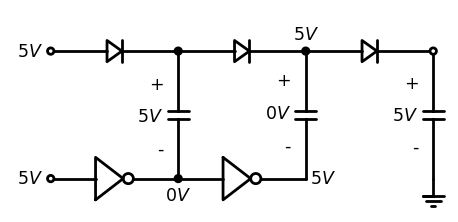

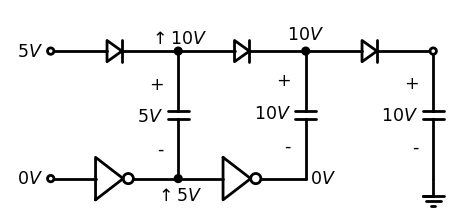

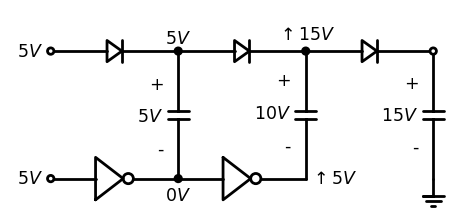

In [33]:
with schemdraw.Drawing() as d:
    d += elm.Diode().idot(open=True).dot().label('$5V$', 'L')
    d.push()
    d += elm.Capacitor().down().dot().label(('+', '$5V$', '-')).label('$0V$', 'L')
    d.push()
    d += lgc.Not().reverse().left().dot(open=True).label('$5V$', 'L')
    d.pop()

    d += lgc.Not().right().label('$5V$', 'R')
    d += elm.Capacitor().up().dot().label(('-', '$0V$', '+')).label('$5V$', 'R')
    d.pop()

    d += elm.Diode().right()
    d += elm.Diode().dot(open=True)
    d += elm.Capacitor().down().label(('+', '$5V$', '-'))
    d += elm.Ground()

with schemdraw.Drawing() as d:
    d += elm.Diode().idot(open=True).dot().label('$5V$', 'L')
    d.push()
    d += (elm.Capacitor()
        .down()
        .dot()
        .label(('+', '$5V$', '-'))
        .label('$\\uparrow 5V$', 'L')
        .label('$\\uparrow 10V$', 'R')
    )
    d.push()
    d += lgc.Not().reverse().left().dot(open=True).label('$0V$', 'L')
    d.pop()

    d += lgc.Not().right().label('$0V$', 'R')
    d += elm.Capacitor().up().dot().label(('-', '$10V$', '+')).label('$10V$', 'R')
    d.pop()

    d += elm.Diode().right()
    d += elm.Diode().dot(open=True)
    d += elm.Capacitor().down().label(('+', '$10V$', '-'))
    d += elm.Ground()

with schemdraw.Drawing() as d:
    d += elm.Diode().idot(open=True).dot().label('$5V$', 'L')
    d.push()
    d += elm.Capacitor().down().dot().label(('+', '$5V$', '-')).label('$0V$', 'L').label('$5V$', 'R')
    d.push()
    d += lgc.Not().reverse().left().dot(open=True).label('$5V$', 'L')
    d.pop()

    d += lgc.Not().right().label('$\\uparrow 5 V$', 'R')
    d += elm.Capacitor().up().dot().label(('-', '$10V$', '+')).label('$\\uparrow 15V$', 'R')
    d.pop()

    d += elm.Diode().right()
    d += elm.Diode().dot(open=True)
    d += elm.Capacitor().down().label(('+', '$15V$', '-'))
    d += elm.Ground()


### Spannunginvertierer

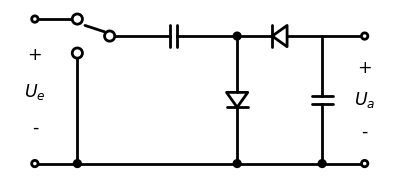

In [34]:
with schemdraw.Drawing() as d:
    start = d.here
    d += elm.Line().length(1).idot(open=True)
    d += (sw := elm.SwitchSpdt2().reverse().anchor('b').drop('a'))
    d += elm.Capacitor().dot()
    d.push()
    d += elm.Diode().reverse().length(2)
    d.push()
    d += elm.Line().length(1).dot(open=True)
    uap = d.here
    d.pop()
    d += elm.Capacitor().down()
    tmp = d.here
    d.pop()

    d += elm.Diode().down().dot()
    d.push()
    d += elm.Wire('-').to(tmp).dot()
    d += elm.Line().right().length(1).dot(open=True)
    d += elm.Gap().reverse().to(uap).label(('-', '$U_a$','+'))
    d.pop()

    d += elm.Line().tox(sw.c[0]).dot()
    d.push()
    d += elm.Line().to(sw.c)
    d.pop()
    d += elm.Line().length(1).left().dot(open=True)
    d += elm.Gap().to(start).label(('-', '$U_e$', '+'))


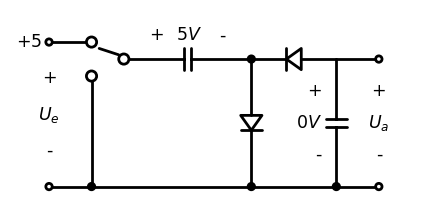

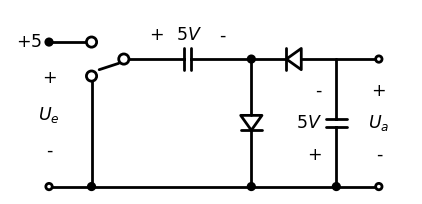

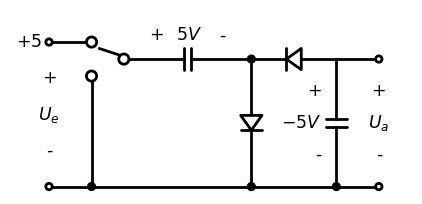

In [35]:
with schemdraw.Drawing() as d:
    start = d.here
    d += elm.Line().length(1).idot(open=True).label('$+5$', 'L')
    d += (sw := elm.SwitchSpdt2().reverse().anchor('b').drop('a'))
    d += elm.Capacitor().dot().label(('+', '$5V$', '-'))
    d.push()
    d += elm.Diode().reverse().length(2)
    d.push()
    d += elm.Line().length(1).dot(open=True)
    uap = d.here
    d.pop()
    d += elm.Capacitor().down().label(('+', '$0V$', '-'))
    tmp = d.here
    d.pop()

    d += elm.Diode().down().dot()
    d.push()
    d += elm.Wire('-').to(tmp).dot()
    d += elm.Line().right().length(1).dot(open=True)
    d += elm.Gap().reverse().to(uap).label(('-', '$U_a$','+'))
    d.pop()

    d += elm.Line().tox(sw.c[0]).dot()
    d.push()
    d += elm.Line().to(sw.c)
    d.pop()
    d += elm.Line().length(1).left().dot(open=True)
    d += elm.Gap().to(start).label(('-', '$U_e$', '+'))
    
with schemdraw.Drawing() as d:
    start = d.here
    d += elm.Line().length(1).idot(open=False).label('$+5$', 'L')
    d += (sw := elm.SwitchSpdt2().reverse().anchor('c').drop('a').flip())
    d += elm.Capacitor().dot().label(('+', '$5V$', '-'))
    d.push()
    d += elm.Diode().reverse().length(2)
    d.push()
    d += elm.Line().length(1).dot(open=True)
    uap = d.here
    d.pop()
    d += elm.Capacitor().down().label(('-', '$5V$', '+'))
    tmp = d.here
    d.pop()

    d += elm.Diode().down().dot()
    d.push()
    d += elm.Wire('-').to(tmp).dot()
    d += elm.Line().right().length(1).dot(open=True)
    d += elm.Gap().reverse().to(uap).label(('-', '$U_a$','+'))
    d.pop()

    d += elm.Line().tox(sw.c[0]).dot()
    d.push()
    d += elm.Line().to(sw.b)
    d.pop()
    d += elm.Line().length(1).left().dot(open=True)
    d += elm.Gap().to(start).label(('-', '$U_e$', '+'))

with schemdraw.Drawing() as d:
    start = d.here
    d += elm.Line().length(1).idot(open=True).label('$+5$', 'L')
    d += (sw := elm.SwitchSpdt2().reverse().anchor('b').drop('a'))
    d += elm.Capacitor().dot().label(('+', '$5V$', '-'))
    d.push()
    d += elm.Diode().reverse().length(2)
    d.push()
    d += elm.Line().length(1).dot(open=True)
    uap = d.here
    d.pop()
    d += elm.Capacitor().down().label(('+', '$-5V$', '-'))
    tmp = d.here
    d.pop()

    d += elm.Diode().down().dot()
    d.push()
    d += elm.Wire('-').to(tmp).dot()
    d += elm.Line().right().length(1).dot(open=True)
    d += elm.Gap().reverse().to(uap).label(('-', '$U_a$','+'))
    d.pop()

    d += elm.Line().tox(sw.c[0]).dot()
    d.push()
    d += elm.Line().to(sw.c)
    d.pop()
    d += elm.Line().length(1).left().dot(open=True)
    d += elm.Gap().to(start).label(('-', '$U_e$', '+'))

## Datensicherungsverfahren

### Paritätsbit

Es wird die Anzahl der Einsen gezählt, 
    anschließend wird aufgrund der Anzahl bestimmt welchen Wert das Paritätsbit haben soll.  
Das Paritätsbit wird XOR gebildet 
    XOR können nacheinander gerechnet werden.

- EVEN
    Mit dem Paritätsbit ist die Anzahl der Einen Gerade  
     $\quad\left(b_0 \oplus b_1 \oplus b_2 \oplus ...\oplus b_n\right)$
- ODD
    Mit dem Paritätsbit ist die Anzahl der Einsen Ungerade  
    $\neg\left(b_0 \oplus b_1 \oplus b_2 \oplus ...\oplus b_n\right)$

Zur Kontrolle wird beim Empfänger wieder die Parität gebildet 
    und anschließend mit dem gesendeten Paritätsbit XOR gerechnet.
Wenn dabei $0$ rauskommt ist die Nachricht OK (sofern max 1 Bit-Fehler auftreten können) 
    und wenn $1$ rauskommt ist die Nachricht sicher Falsch

Das Paritätsbit hat eine Hamming Distanz von $1$

### Hamming-Distanz

Die Hamming Distanz gibt an wie viele Bit-Flips mindestens auftreten müssen,
     um zum nächsten gültigen Wert zu kommen.

- max. detektierbare Fehler Anzahl:  
    $k = h-1$
- max. korrigierbare Fehler Anzahl:  
    $t = \text{floor}\left(\frac{d_{min} - 1}{2}\right)$

## CRC (Cycle Redundancy Check)

### Grundprinzip

![](mtrs_media/crc_principle.png)

### Generatorpolynom

$I(x)$...Nutzdaten  
$G(x)$...Generatorpolynom  
$R(x)$...Divisionsrestes  

Generatorpolynom gibt eine Bitfolge an, 
    alle vorhandenen Potenzen geben eine 1 in der Bitfolge an  
Das MSB **muss** immer 1 sein.  
Das Generatorpolynom hat die Höchste Potenz + 1 stellen.  

Bsp.  
$G(x) = x^5 + x^4 + x^2 + 1$  
$G(x) = 110101$


Berechnungsschema:  
$I(x)\qquad r-1~\text{Nullen}\quad:\quad G(x)$  

### Rechnenprinzip

![](mtrs_media/crc_calc.png)


### Fehlererkennung

Zur Kontrolle muss die CRC-Checksum erneut berechnet werden, 
    mit der gesendeten Checksumme als Teil der Übertragung  

Wenn die Übertragung korrekt und ohne Fehler war, 
    ist der Wert welcher zurück gesendet wird 0  

![](mtrs_media/crc_test.png)

### Schaltung

![](mtrs_media/crc_circ.png)

## I2C

### Spezifikation

Es gibt zwei Leitungen SDA (Datenleitung) und SCL (Clockleitung),
    welche auf HIGH gezogen werden.  
Dadurch ist die Leitung auf 0,
    sobald mindestens ein Teilnehmer die Leitung auf 0 zieht.  

Jeder Teilnehmer besitzt eine einzigartige Adresse,
    je nach Aufgabe kann dieser nur Senden (Tastatur),
    nur Empfangen (LC-interface) oder beides(Speicherbaustein)  
Der Master muss beim Senden die Arbitrierung "gewinnen",
    in der Arbitrierungsphase wird die Empfänger Adresse ausgeschrieben.
Der Teilnehmer der die niederwertigste Adresse ansprechen will gewinnt die Arbitrierung.  
Nur weil jeder Teilnehmer Master und Slave sein könnte,
    muss dies nicht sein.  

Wenn sich ein Bit-Level ändert muss die SCL-Leitung auf Low sein
Ferner wenn ein Teilnehmer länger braucht um etwas zu verarbeiten kann dieser die SCL Leitung auf LOW ziehen 
    und somit mit der Übertragung fortfahren wenn der Teilnehmer bereit ist.  

Start- und Stopp-Bedingungen werden durch Änderung des SDA Pegel bei HIGH Pegel auf der SCL Leitung gesendet (Verletzung des nicht Veränderns der SDA-Leitung)

### Adressierung

Jeder Teilnehmer, welcher angesprochen werden soll,
    hat eine eindeutige Slave Adresse, 
    welche ausgesendet wird, wenn jemand diesen Baustein ansprechen will.
Master-Only Bausteine brauchen keine Adresse.

Die Adresse ist normalerweise 7-Bit, kann aber auf 10-Bit erweitert werden (meist 7-Bit).  
Diese Adresse wird bei der Arbitrierung ausgesendet,
Zusätzlich zur Adresse wird noch ein Read Flag ausgesendet $R/\overline{W}$,
    welche indiziert ob der aus dem Baustein gelesen oder geschrieben werden soll.

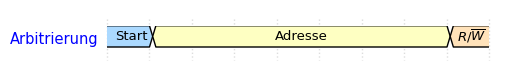

In [36]:
lgc.TimingDiagram(
    {'signal': [
        {'name': 'Arbitrierung', 'wave': '53......4', 'data': ['Start', 'Adresse', '$R/\\overline{W}$']}
    ]
}) 

### Wired-AND

Durch Wired-AND wird, sobald ein Teilnehmer LOW senden möchte, die Leitung auf LOW gehen
    und alle anderen Teilnehmer überschreibt.
Dies ermöglicht die Arbitrierung 
    und das ein Teilnehmer die Clock Leitung auf LOW ziehen kann wenn dieser mehr Zeit braucht.

### Datanübertragunsrahmen

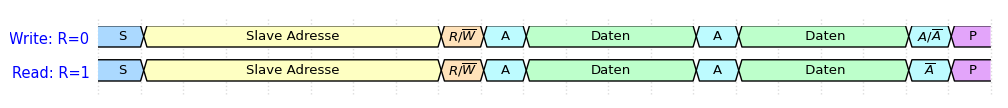

In [37]:
lgc.TimingDiagram(
    {'signal': [
        {'name': 'Write: R=0',
            'wave': '53......467...67...68',
            'data': ['S', 'Slave Adresse', '$R/\\overline{W}$', 'A', 'Daten', 'A', ' Daten', '$A/\\overline{A}$', 'P']
        },
        {'name': 'Read: R=1',
            'wave': '53......467...67...68',
            'data': ['S', 'Slave Adresse', '$R/\\overline{W}$', 'A', 'Daten', 'A', ' Daten', '$\\overline{A}$', 'P']
        }
    ]}
)

$A$...Acknowledge SDA-LOW  
$\overline{A}$...not Acknowledge-HIGH  
$S$...Start Bedingung  
$P$...Stopp Bedingung  

### Ablauf Datensenden und Datenempfang

Beim Start wird bei **SCL HIGH** **SDA auf LOW** gezogen.

Zuerst findet die **Arbitrierung** statt,
    jeder Master der Senden möchte Sendet die Slave-Adresse

Datensendung MSB zu LSB (**MSB-First**)  

Ein Block an Daten ist **immer 8-Bit** (1-Byte),  
    die Anzahl an Bytes ist Theoretisch unbegrenzt, 
    es kann sein das die Bausteine eine begrenzte Anzahl an Bytes senden/empfangen können.

Am Ende wird die Übertragung mit einem Acknowledge abgeschlossen.
Dieses gibt an ob der Teilnehmer die Übertragung weiterführen oder abbrechen will.
- $\text{ACK} = 0\Rightarrow \text{Senden weiterführen}$  
- $\text{ACK} = 1\Rightarrow \text{Senden abbrechen}$  

Es **liefert** immer der Teilnehmer das **ACK-Bit**,
    welche die **Daten Empfängt** (Master wenn Slave sendet, Slave wenn Master sendet)  

Am Ende kommt die **Stopp Bedingung**, 
    wo bei **HIGH SCL** **SDA auf HIGH** gebracht wird.  
Alternativ kann der Master die Repeated Start Bedingung senden,
    womit er wieder die Slave Adresse aussendet und 

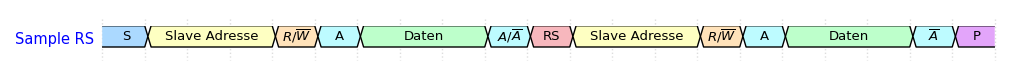

In [38]:
lgc.TimingDiagram(
    {'signal': [
        {'name': 'Sample RS',
            'wave': '53..467..693..467..68',
            'data': ['S', 'Slave Adresse', '$R/\\overline{W}$', 'A', 'Daten', '$A/\\overline{A}$', 
                    'RS' ,'Slave Adresse', '$R/\\overline{W}$','A', 'Daten', '$\\overline{A}$','P']
        },
    ]}
)

$RS$...Repated Start

### Busarbitrierung

Jeder sendet die Slave Adresse aus, 
    zu die er senden möchte.  
Der jedes Mal wenn ein Teilnehmer überschrieben wird,
    schaltet sich dieser Teilnehmer weg
    und sendet den rezessiven Zustand (HIGH)


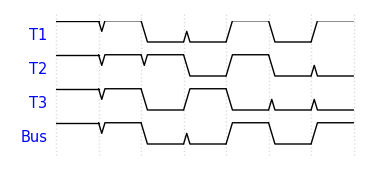

In [39]:
# 1 1 0 0 1 0 1
# 1 1 1 0 1 0 0
# 1 1 0 1 0 0 0
lgc.TimingDiagram({'signal': [
    {'name': 'T1',  'wave': '1100101'},
    {'name': 'T2',  'wave': '1110100',},
    {'name': 'T3',  'wave': '1101000',},
    {'name': 'Bus', 'wave': '1100101'}
]})

T2 Schaltet sich beim 3. Bit weg  
T3 Schaltet sich beim 4. Bit weg  

### Zusatz  

Wenn ein Slave einen Master bei einem Ereignis benachrichtigen möchte,
    braucht man eine Trigger-Leitung
    (Stichwort Pin erweiterungs Baustein)

## Can

### Spezifikation

Controller Area Network  

**Merkmale**  
- Asynchron und Seriell
- HW Realisierung  
- Ziel: Kabelbäume in Autos Reduzieren  

**Netzwerk**  
- CAN-Knoten  
- Linien-/Sterntopologie  
- verdrillte ungeschirmte Zweidrahtleitung  
- symmetrische Signalübertragung  
- Datenrate: max 1MBit/s bei 40m
- $120\Omega$ Terminierung  
- 32 Teilnehmer pro Busstrang
    mehrere durch Repeater  
- Bestandteile eines CAN-Knotens
    - Host  
        Übergeordneter Host
    - CAN Controller  
        einheitliche Abwicklung des CAN Protokolls
    - CAN Transceiver  
        Ankopplung CAN-Controller an CAN-Bus
- Differenzialübertragung  
- High- und Low-Speed Übertragung  
    - Highspeed  
        $40\text{kBit/s}$...$1\text{MBit/s}$
        - HIGH: rezessiv, $2.5V$ auf beiden Leitungen
        - LOW: dominant, CAN$_{high} = 3.5V$ CAN$_{low} = 1.5V$ $U_{diff} = 2V$
    - Lowspeed  
        $5\text{kBit/s}$...$125\text{kBit/s}$  
        CAN bleibt nur mit einer Plus Leitung funktionsfähig
        - HIGH: rezessiv, CAN$_{high} = 0V$ CAN$_{low} = 5V$ $U_{diff} = 5V
        - LOW: dominant, CAN$_{high} = 3.6V$ CAN$_{low} = 1.6V$ $U_{diff} = 2V$
- Dominanter und rezessiver Pegel  

- Data Frames nicht von Zeit sonder vom Auftreten spezieller Ereignisse  
- Nachrichtenlänge max 130 Bit  
- kein Zeitplan, Nachrichten werden versendet wenn sie anfallen $\rightarrow$ Kollisionsgefahr  
- CSMA/CA  
- Verzögerung niederprioren Nachrichten $\rightarrow$ Beeinträchtigung der Echtzeitfähigkeit 

### Adressierung

Es wird die ID des Datagramms ausgesendet, 
    jeder der Interesse an diesen Datagramm hat wechselt in den Empfangsmodus und liest es ein

### Wired-AND

und a drittes mal  
Leitung wird auf HIGH gezogen (rezessiver Pegel) 
    und sobald ein Teilnehmer LOW senden möchte wird LOW gesendet (dominanter Pegel).

### Datanübertragunsrahmen

![](mtrs_media/can_df.png)  

- Bus-Idle:  
    Ruhephase des Systems  
- SOF:  
    **S**tart **o**f **F**rame  
- Identifier:  
    ID der Botschaft für Arbitrierung  
- RTR:  
    **r**emote **t**ransmission **r**equest  
    kennzeichnet ob das Frame Daten enthält oder zum senden von Daten auffordert  
- IDE:  
    Identifier extension  
    Standardtelegramm low  
- DLC:  
    Data length Control  
    Längeninformationen über das Datenfeld  
- Data field:  
    enthält die Nutzdaten  
- CRC-Checksum:  
    CRC Checksumme  
- DEL:  
    CRC delimiter  
- ACK:  
    Alle Teilnehmer welche die Botschaft korrekt empfangen haben quittieren durch senden dominanten Pegel  
    Sender sendet rezessiven Pegel und erwartet überschrieben zu werden  
- DEL:  
    ACK delimiter  
- EOF:   
    kennzeichnet End of Frame  
    Bewusste Codierungs-Verletzung durch senden von mehr als 5 rezessive Bits  
- ITM:
    Intermission, trennt Botschaften ab

### Ablauf Datensenden und Datenempfang

- Datenübertragung erfolgt mittels Nachrichtenrahmen **CAN Data Frames**  
- Nutzdaten bis acht Byte können in einem Frame übertragen werden  
- Jeder Data Frame steht jedem Knoten zur Übernahme zur Verfügung  
- Jeder Data Frame hat einen **Identifier (ID)**, welcher die Nachricht kennzeichnet

### Busarbitrierung

- CSMA/CA  
- verhindert Kollisionen  
- Identifier der CAN Botschaft zur Arbitrierung bitweise vom MSB zum LSB (MSB-First)  
- CAN Botschaft mit der niedrigsten ID wird gewinnt und wird übertragen  
- Knoten welche die Arbitrierung verlieren gehen in Empfangsmodus und Warten bis Bus wieder frei  

![](mtrs_media/can_arbit.png)

### Physikalische und Strukturelle Fehlererkennungsmaßnahmen

### Bit-Stuffing

Bei Asynchroner Datenübertragung werden die Flanken zum synchronisieren des Datagramms verwendet.  

Wenn allerdings länger der selbe Pegel bleibt, 
    kann dies zu Problemen bei der Auslesung führen.  
Um dies zu verhindern, 
    überträgt man ein Stuffing Bit, 
    welches für eine Flanke sorgt.  

Da beide Teilnehmer das Stuffing erwarten gibt es keine Probleme bei der Dekodierung

## OSI-ISO-Modell für Schnittstellen

![](mtrs_media/osii.png)  

Merksatz: "**P**lease **d**o **n**ot **t**hrow **s**alami **p**izzas **a**way!"

Als für einen Feldbus müssen mindestens 3 Schichten vorhanden sein:  
- Application Layer  
    Zugriff auf das Kommunikationssystem (Software Library)
- Data Link Layer  
    Datagramm Aufbau, Fehlererkennung, Buszugriff
- Physical Layer  
    Wie werden die Bit übertragen

Optional:  
- Network Layer  
    Übertragungsweg über Busknoten

# Regelungstechnik

In [40]:
def create_block(text:str='',*, wpadding=1.5):
    return elm.Ic(
        pins=[
            elm.IcPin(side='L', anchorname='in1'),
            elm.IcPin(side='R', anchorname='out')
        ], edgepadW=wpadding
    ).label(text, 'center').anchor('in1').drop('out')

def create_sumation(in1='+', in2='-'):
  return (dsp
    .Circle()
    .drop('E')
    .label(in1, loc='W', ofst=(0, 0.3))
    .label(in2, loc='S', ofst=(.3, 0)))
#display(create_block('$IT1$-Element'))

## Regelkreis

### Standardregelkreis

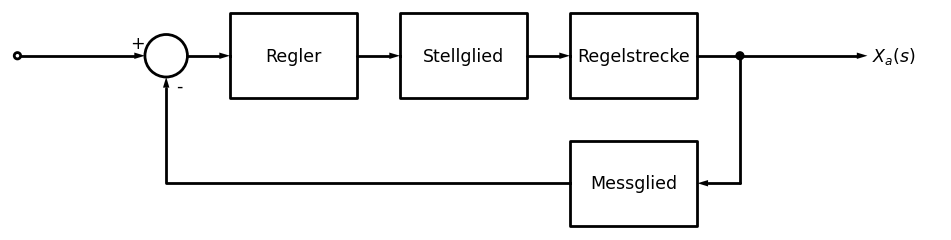

In [41]:
with schemdraw.Drawing() as d:
    d += elm.Line(arrow='->').idot(open=True)
    d += (c := create_sumation())

    d += elm.Line(arrow='->').length(1)
    d += dsp.Box().label('Regler')
    d += elm.Line(arrow='->').length(1)
    d += dsp.Box().label('Stellglied')
    d += elm.Line(arrow='->').length(1)
    d += dsp.Box().label('Regelstrecke')
    d += elm.Line().length(1).dot()
    d.push()
    d += elm.Line(arrow='->').label('$X_a(s)$', 'R')
    d.pop()
    d += elm.Line().down().length(3)
    d += elm.Line(arrow='->').left().length(1)
    d += dsp.Box().left().reverse().label('Messglied').drop('W')
    d += elm.Wire('-|', arrow='->').to(c.S)

### Blockschaltbild

Das Blockschaltbild ist die Darstellung einer Regelung in Funktionsblöcken.  

Darstellung ohne Räumliche Zuordnung. 
Mehrere Blöcke oft durch einzelnes wirkliches Element


### Bestimmung Sprungantwort

Übertragungsfunktion ist $G(s) = \frac{U_a(s)}{U_e(s)}$  

Bei Sprungantwort $U_e = \frac{1}{s}$  
Einsetzen und auf $U_a(s)$ umformen, 
    wenn möglich vereinfachen 
    und mit Laplace Tabelle zurück transformieren.

### Ü-Funktion zwischen Ausgängen und Eingängen von Regelkreisen

- Ein Pfeil bedeutet Multiplikation, die Werte sind dabei die Werte in den Boxen
- Ein Kreis (oft mit Vorzeichen) bezeichnet eine Addition/Subtraktion  

Es gelten die selben Arithmetischen Regeln wie Regulär in Mathe.

Die Übertragungsfunktion gibt immer $\frac{U_a(s)}{U_e(s)}$ an.

### Beschreibung im Zeit- und Frequenzbereich

Im Frequenzbereich/Bildbereich beschreibt das Bode Diagramm (Amplitudengang & Phasengang).

Im Zeitbereich beschreibt die Sprungantwort das Element.

### Rückwirkungsfreiheit 

Damit zwei Boxen wirklich multipliziert werden können, müssen diese Rückwirkungsfrei sein,
    sprich die zweite Box darf die erste nicht Beeinflussen.
Ansonsten müssen diese Aufwendig, über die Schaltungen, aneinander geschaltet werden.  

Die Rückwirkungsfreiheit wird über OPVs erreicht, 
    welche die Schaltungen entkoppeln

- Zwei RC-TPs
  - $G(s)$ wäre $\frac{1}{1+sR_1C_1}\cdot\frac{1}{1+sR_2C_2}$  
  - Kann nicht sein
- Blöcke können als Eingang und Ausgang modelliert werden
  - für Rückwirkungsfreiheit
    - $r_a << r_e$
    - (Strenggenommen: $|z_a| < |z_e|$ )
    - Bedeutung: Der Ausgangswiderstand muss im Verhältnis zum Eingangswiderstand vernachlässigbar sein
- für zwei TPs würde das heißen:
  - $z_a = R_1 || C_1$  
  - $z_e = R_2 || C_2$  
  - meist einfacher mit OPVs  
  

## Übertragungsfunktion

Die Übertragungsfunktion stellt das Verhältnis von Ausgang zu Eingang dar $\frac{U_a}{U_e}$  

Es gibt sowohl die Übertragungsfunktion für den Zeit und den Bildbereich, 
    wobei im meist die im Bildbereich relevant ist um die Amplitude und Phase im Verhältnis zur Eingangsfrequenz darzustellen.
    $\frac{U_a(s)}{U_e{s}} = G(s)$  
    Die Übertragungsfunktion im Bildbereich kann auch für die Sprungantwort verwendet werden $\left(U_e = \frac{1}{s}\right)$

## Laplace-Transformation

### Vorgehensweise bei Systemantwort (Sprungantwort)

$G(s) = \frac{U_a}{U_e} \Rightarrow U_a(s) = G(s) \cdot U_e \wedge U_e = \frac{1}{s} \Rightarrow U_a(s) = \frac{G(s)}{s} $  

$\mathscr{L}^{-1}\left\{U_a(s)\right\} = \mathscr{L}^{-1}\left\{\frac{G(s)}{s}\right\}$ = ...

### Anwendung von AWT, EWT

$\lim_{s\rightarrow 0+}   ~s \cdot F(s) = \lim_{t\rightarrow\infty}f(t)$  

$\lim_{s\rightarrow\infty}~s \cdot F(s) = \lim_{s\rightarrow 0+}   f(t)$

### Partialbruchzerlegung für $\mathscr{L}^{-1}$

Geogebra Befehl:
> PartialFractions($Function$)

macht die Zerlegung automatisch,
    dies wird verwendet um Komplexe Brüche mit Polynomen auf einfachere Brüche aufzuteilen.  
Welche dann - im Idealfall -  in der Transformations-Tabelle vorhanden sind.

### Inverse Laplace-Transformation mittels Transformations-Tabelle

- Man nimmt die jeweilige Form der Funktion im Zeit/Bildbereich
- Man bringt die Funktion in eine Form, welche in der Tabelle gegeben ist
    !! Form muss vorhanden sein
    Partial-Bruch bei Polynombrüchen
- Man suche die Werte für die variablen Konstanten in der Funktionen (e.g. $a$)  
- Man nehme die Funktion auf der anderen Seite und setze die Werte wieder ein
>- Enjoy

![](mtrs_media/laplace_table.png)

## RT-Modelle der OPV-Grundschaltung

### Inv. und nicht inv OPV-Verstärker

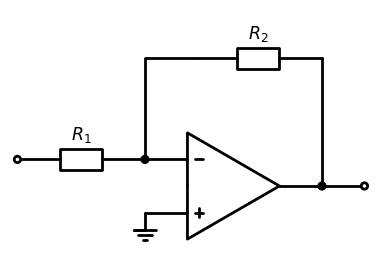

In [42]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('${R_1}$')
    tmp = d.here

    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1'))

    d += elm.Line().length(1).dot()
    d.push()

    d += elm.Line().dot(open=True).length(1)

    d.pop()
    d += elm.Line().up()
    d += elm.ResistorIEC().left().label('${R_2}$')
    d += elm.Wire('-|').to(tmp) 

    d += elm.Line().length(1).left().at(amp.in2)
    d += elm.Ground()

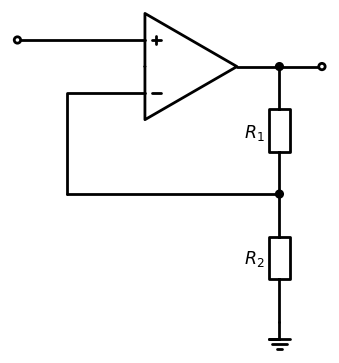

In [43]:
with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True)
    d += (amp := elm.Opamp().anchor('in2').drop('out').flip())
    d += elm.Line().length(1).dot()
    d.push()

    d += elm.Line().length(1).dot(open=True)
    d.pop()
    d += elm.ResistorIEC().down().dot().label('$R_1$')
    d.push()
    d += elm.Line().left().length(5)
    d += elm.Wire('|-').to(amp.in1)
    d.pop()
    d += elm.ResistorIEC().down().label('$R_2$')
    d += elm.Ground()

$U_a = U_e\cdot \left(1 + \frac{R_2}{R_1}\right)$

### Bestimmung der OPV-Verstärkung

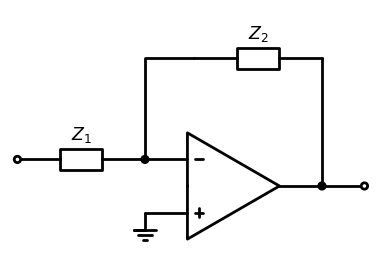

In [44]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('${Z_1}$')
    tmp = d.here

    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1'))

    d += elm.Line().length(1).dot()
    d.push()

    d += elm.Line().dot(open=True).length(1)

    d.pop()
    d += elm.Line().up()
    d += elm.ResistorIEC().left().label('${Z_2}$')
    d += elm.Wire('-|').to(tmp) 

    d += elm.Line().length(1).left().at(amp.in2)
    d += elm.Ground()

$U_a = U_e\cdot -\frac{Z_2}{Z_1}$  

### Auswirkung auf die Regelabweichung

## Zusammengesetzte Frequenzgänge 

### Knickzug vom Amplituden- und Phasengang

Bei der Knickkreisfrequenz $\omega_g$ ist bei den meisten Elementen ein Umschwung der Verstärkerfunktion, bspw. von $0dB/dek$ auf $-20dB/dek$ bei einem PT1-Element

### Zerlegung von Übertragungsfunktionen in Grundglieder

Um Übertragungsfunktion muss in einzelne Elemente zu zerlegen muss es zu einer Reihe an Multiplikationen von $T_1\cdot s$, $\frac{1}{T_1\cdot s}$, $\frac{k}{1+T_1\cdot s}$, $k\cdot(1 + T_1\cdot s)$ zerlegt werden.

### Rekonstruktion von $G(s)$ aus Amplitudenverlauf

Zum Rekonstruieren müssen bei einer Änderung jeweilige Elemente (je nach Veränderung; meist PT1 oder PD) dazugeschaltet werden, 
    bei den zusätzlichen Elementen muss die Verstärkung dimensioniert werden (bei allen außer dem ersten meist $1$), 
    und die Kreisfrequenz des Knicks dimensioniert werden.
Am Anfang muss das jeweilige Element ausgewählt werden welches die Funktion vor jedem Knick gut beschreibt

Um auf die gesamt OPV-Schaltung zu kommen müssen die OPV-Schaltungen der einzelnen Elemente aneinander gehängt werden (Vorzeichen beachten)

## Grundglieder

### I

#### Übertragungsfunktion

$G(s) = \frac{1}{s}$

#### Sprungantwort

$U_a(s) = \frac{1}{s} \cdot U_e = \frac{1}{s}\cdot \frac{1}{s} = \frac{1}{s^2}$

$u_a(t) = t$

#### Bode-Diagramm

$G(i\omega) = \frac{1}{T_1\cdot i\omega}$

#### Amplitudengang

$|G(s)| = \frac{1}{\omega}$

$log|G(s)| = - 20\cdot log(s)$

#### Phasengang

$arg(G(s)) = 0 - \frac{\pi}{2} = 0- 90°$

''

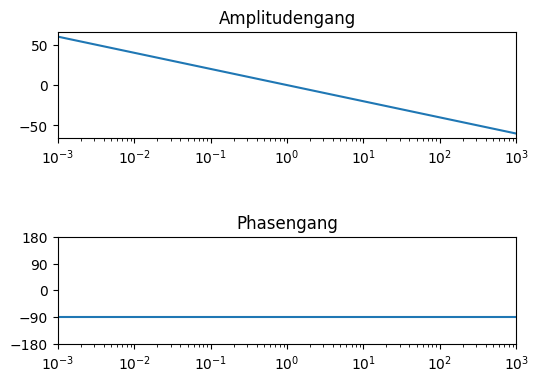

In [45]:
fig, (amp, phase) = plt.subplots(2, 1)
fig.tight_layout(pad=5.0)

t = np.logspace(-3, +3, num=20, base=10)

amp.plot(t, -20*np.log10(t))
amp.set_xscale('log')
amp.set_xlim(1e-3, 1e+3)
amp.set_title('Amplitudengang')

phase.plot(t, np.fromiter((-90 for _ in t), t.dtype))
phase.set_xscale('log')
phase.set_xlim(1e-3, 1e+3)
phase.set_title('Phasengang')
phase.set_ylim(-180, 180)
phase.set_yticks([180, 90, 0, -90, -180])
;

#### OPV-Schaltung

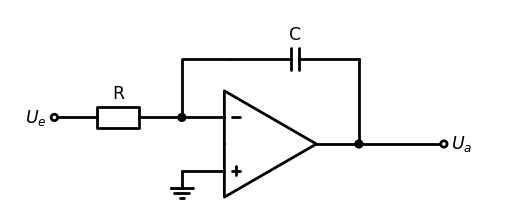

In [46]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('R').label('$U_e$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.Capacitor().left().label('C')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2)
    d += elm.Ground()

### P

#### Übertragungsfunktion

$G(s) = k$

#### Sprungantwort

$U_a(s) = k\cdot\frac{1}{s}$

$u_a(t) = k\cdot \sigma(t)$

#### Bodediagramm

$G(i\omega) = k$

#### Amplitudengang

$|G(s)| = k$

$log|G(s)| = - 20\cdot log(k)$

#### Phasengang

$arg(G(s)) = 0$

''

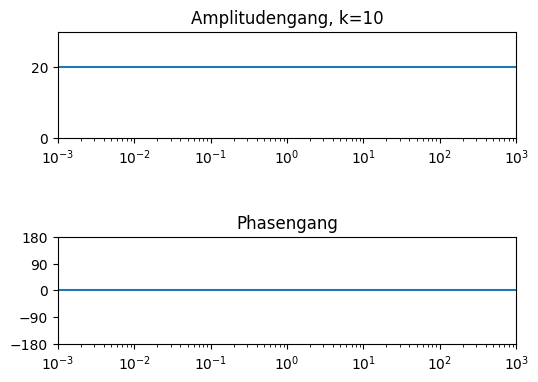

In [47]:

fig, (amp, phase) = plt.subplots(2, 1)
fig.tight_layout(pad=5.0)

t = np.logspace(-3, +3, num=20, base=10)

amp.plot(t, np.fromiter((20*np.log10(10) for _ in t), dtype=t.dtype))
amp.set_xscale('log')
amp.set_xlim(1e-3, 1e+3)
amp.set_ylim(-0.1, 30)
amp.set_title('Amplitudengang, k=10')

phase.plot(t, np.fromiter((0 for _ in t), t.dtype))
phase.set_xscale('log')
phase.set_xlim(1e-3, 1e+3)
phase.set_title('Phasengang')
phase.set_ylim(-180, 180)
phase.set_yticks([180, 90, 0, -90, -180])
;

#### OPV-Schaltung

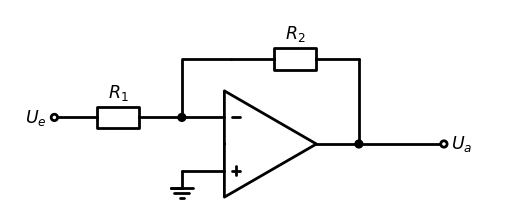

In [48]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('$R_1$').label('$U_e$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_2$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2)
    d += elm.Ground()


### D

#### Übertragungsfunktion

$G(s) = T_1\cdot s$

#### Sprungantwort

$U_a(s) = T_1\cdot s\cdot\frac{1}{s}$

$u_a(t) = T_1\cdot \delta(t)$

#### Bodediagramm

$G(i\omega) = T_1 \cdot i\omega$

#### Amplitudengang

$|G(s)| = T_1\cdot\omega$

$log|G(s)| = - 20\cdot log(T_1\cdot\omega)$

#### Phasengang

$arg(G(s)) = 90°$

''

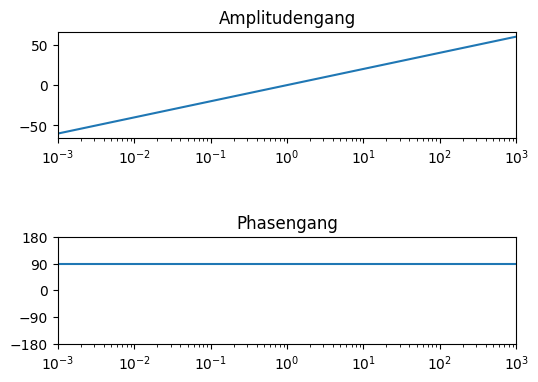

In [49]:

fig, (amp, phase) = plt.subplots(2, 1)
fig.tight_layout(pad=5.0)

t = np.logspace(-3, +3, num=20, base=10)

amp.plot(t, 20*np.log10(t))
amp.set_xscale('log')
amp.set_xlim(1e-3, 1e+3)
amp.set_title('Amplitudengang')

phase.plot(t, np.fromiter((90 for _ in t), t.dtype))
phase.set_xscale('log')
phase.set_xlim(1e-3, 1e+3)
phase.set_title('Phasengang')
phase.set_ylim(-180, 180)
phase.set_yticks([180, 90, 0, -90, -180])
;

#### OPV-Schaltung

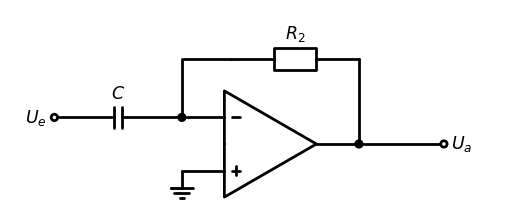

In [50]:
with schemdraw.Drawing() as d:
    d += elm.Capacitor().dot().idot(open=True).label('$C$').label('$U_e$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_2$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2)
    d += elm.Ground()


### PT1, PI, PD, DT1 Zusammen

|                    | PT1                                                 | PD                                     | PI                                                           | DT1                                                         |
|--------------------|-----------------------------------------------------|----------------------------------------|--------------------------------------------------------------|-------------------------------------------------------------|
| $G(s)$             | $k\cdot\frac{1}{1 + T_1\cdot s}$                    | $k\cdot(1 + T_1\cdot s)$              | $k\cdot\frac{T_1\cdot s + 1}{T_1 \cdot s}$                    | $k\cdot\frac{T_1\cdot s}{1+T_1\cdot s}$                     |
| $\|G(i\omega)\|$   | $\|k\|\cdot\frac{1}{\sqrt{1 + T_1^2\cdot\omega^2}}$ | $k\cdot\sqrt{1 + T_1^2\cdot \omega^2}$ | $\|k\|\cdot\frac{\sqrt{1 + T_1^2\omega^2}}{T_1\cdot \omega}$ | $\|k\|\cdot\frac{T_1\cdot\omega}{\sqrt{1 + T_1^2\omega^2}}$ |
| $arg(G(i\omega)\|$ | $0 - arctan(T_1\omega)$                             | $arctan(T_1\cdot\omega)$               | $arctan(T_1\cdot\omega)-90°$                                 | $90°-arctan(T_1\cdot\omega)$                                |

### Amplitudengang für Name

Beim Verbinden von zwei Punkten durch den Mittelpunkt,
    ergibt sich der Amplitudengang für das Regelelement für die dazugehörigen Buchstaben,
    von dieser Form kann $G(s)$ hergeleitet werden und von dieser der Rest

''

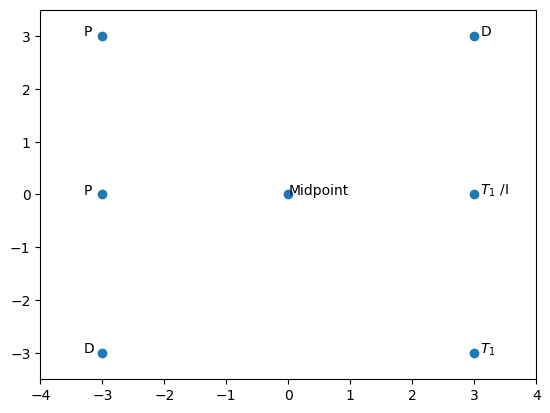

In [51]:
fig, ax = plt.subplots()

ax.text(-3.3,  3, 'P')
ax.text(-3.3,  0, 'P')
ax.text(-3.3, -3, 'D')


ax.text(3.1,  3, 'D')
ax.text(3.1,  0, '$T_1~$/I')
ax.text(3.1, -3, '$T_1$')

ax.text(0, 0, 'Midpoint')

ax.scatter([-3,-3,-3, 0, 3, 3, 3], [3, 0, -3, 0, 3, 0, -3])

ax.set_xlim(-4, 4)
ax.set_ylim(-3.5, 3.5)
;

### Sprungantwort

Man nimmt $G(s)$, $G(s) = \frac{U_a(s)}{U_e(s)}$, wenn dies nun auf $U_a(s)$ Umgeformt wird so ergibt sich $U_a(s) = G(s)\cdot U_e(s)$.

Um die Sprungantwort zu berechnen wir in das Regelglied $U_e(s) = \frac{1}{s}$ geschickt.
Dadurch ergibt sich: $U_a(s) = G(s)\cdot\frac{1}{s}$.
Hier muss man nun für $G(s)$, für das entsprechende Regelelement einsetzen und anschließend Rücktransformieren.

### OPV-Schaltung

Die Form des Amplitudenganges über den unteren Graphen legen und die nächste Vertikale Linie nehmen, 
Wenn diese näher an Seriell ist so sind Kapazität und Widerstand in Serie geschaltet, 
    bei Parallel, Parallel.
Wenn der Linie zu Output geht so ist die Verschaltung von Widerstand und Kapazität am Ausgangspfad
    und wenn näher bei Input beim Eingang.

<a id='OPV-Circuit-Generator'>

''

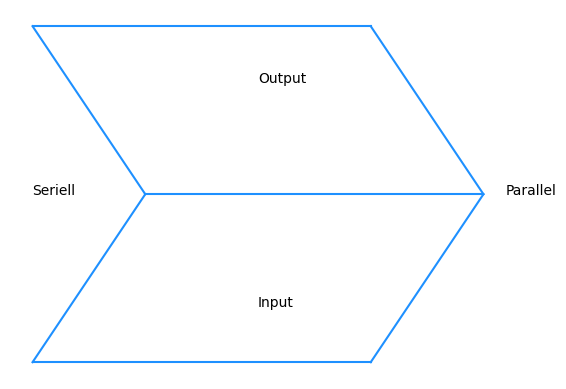

In [52]:
fig, ax = plt.subplots()

ax.plot([-1, -2], [0, 3], color="dodgerblue")
ax.plot([-1, -2], [0, -3], color="dodgerblue")

ax.plot([-2, 1], [3, 3], color="dodgerblue")
ax.plot([-2, 1], [-3, -3], color="dodgerblue")
ax.plot([-1, 2], [0, 0], color="dodgerblue")

ax.plot([1, 2], [3, 0], color="dodgerblue")
ax.plot([1, 2], [-3, 0], color="dodgerblue")

ax.text(0, 2, 'Output')
ax.text(0, -2, 'Input')
ax.text(-2, 0, 'Seriell')
ax.text(2.2, 0, 'Parallel')


ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
;

### IT1

Zusammengesetzt aus einem I- und einem PT1-Regler.

Amplitudengänge addieren sich im logarithmischen Bereich.
Und Phasengänge Addieren sich.

$G(s) = \frac{k}{T_I\cdot s\cdot(1 + T_1\cdot s)}$
...

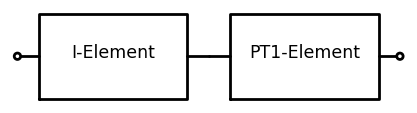

In [53]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += create_block('I-Element')
    d += create_block('PT1-Element')
    d += elm.Dot(open=True)

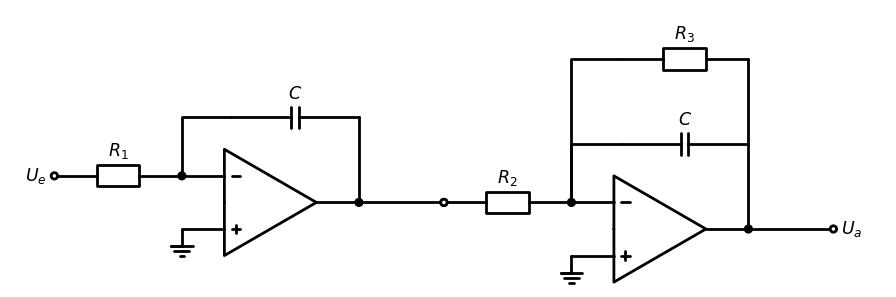

In [54]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('$R_1$').label('$U_e$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp1 := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += (r2 := elm.Capacitor().left().label('$C$'))
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True)
    d.push()

    d += elm.Line().left().length(1).at(amp1.in2)
    d += elm.Ground()

    d.pop()

    d += elm.ResistorIEC().dot().idot(open=True).label('$R_2$') 
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp2 := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)

    d.push()
    d += elm.Capacitor().left().label('$C$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_3$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')
    d.push()

    d += elm.Line().left().length(1).at(amp2.in2)
    d += elm.Ground()



### PDT1

Das PDT1-Element setzt sich aus 1xPT1 und 1xPD -Element zusammen

$G(s) = \frac{\left(1+sT_1\right)}{\left(1+sT_1\right)}$

$|G(j\omega)| = \frac{\sqrt{1+\omega^2T_1^2}}{\sqrt{1 + \omega^2T_2^2}}$

$arg(j\omega) = atan(\omega T_1) - atan(\omega T_2)$

''

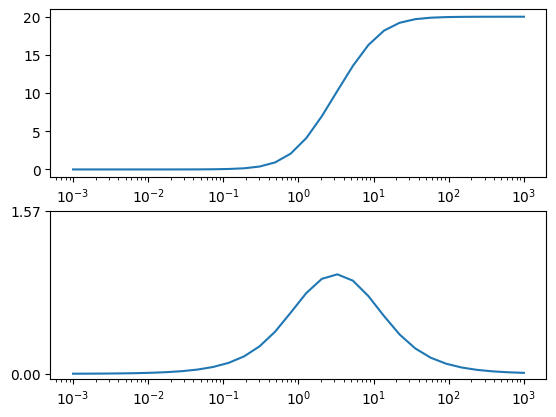

In [55]:
T_1 = 1/1
T_2 = 1/10

aG = lambda w: np.sqrt(1 + w**2 * T_1**2)/ np.sqrt(1 + w**2 * T_2**2)
pG = lambda w: np.arctan(w*T_1) - np.arctan(w*T_2)

w = np.logspace(-3, 3, 30)  

fig, (amp, ph) = plt.subplots(2, 1)  

amp.plot(w, 20*np.log10(aG(w)))
amp.set_xscale('log')

ph.plot(w, pG(w))
ph.set_xscale('log')
ph.set_yticks([np.pi/2, 0])
;

OPV-Schaltung ist ein inv Verstärker mit $R||C$ für $Z_1$ **und** $Z_2$

#### Sprungantwort

$U_a(s) = \frac{1 + sT_1}{1 + sT_2} \cdot \frac{1}{s}$  

$= \frac{1 + sT_1}{s + s^2T_2} $  
mit Tabelle: $u_a(t) = 1- \left(1-\frac{T_1}{T_2}\right)\cdot e^{-\frac{t}{T_2}}$

''

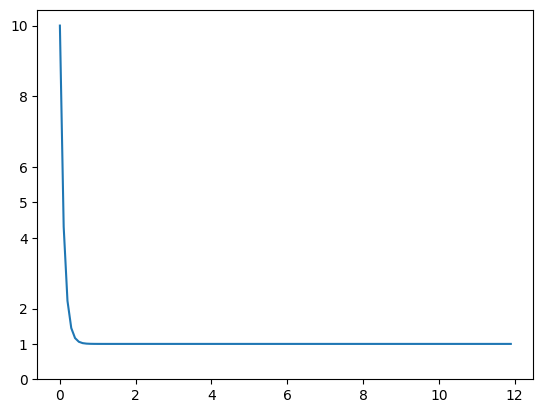

In [56]:
T_1 = 1/1
T_2 = 1/10

fig, ax = plt.subplots()

t = np.arange(0, 12, 0.1)

ua = lambda t: 1 - (1-T_1/T_2) * np.e**(-t/T_2)

ax.plot(t, ua(t))
ax.set_yticks([0,1,2,4,5,6,8, 10])
;

Startwert ist $k\cdot\frac{T_1}{T_2}$  
Endwert ist $k$

### OPV-Schaltung aus Blockdiagramm

Zum Rekonstruieren müssen bei einer Änderung jeweilige Elemente (je nach Veränderung; meist PT1 oder PD) dazugeschaltet werden, 
    bei den zusätzlichen Elementen muss die Verstärkung dimensioniert werden (bei allen außer dem ersten meist $1$), 
    und die Kreisfrequenz des Knicks dimensioniert werden.
Am Anfang muss das jeweilige Element ausgewählt werden welches die Funktion vor jedem Knick gut beschreibt

Um auf die gesamt OPV-Schaltung zu kommen müssen die OPV-Schaltungen der einzelnen Elemente aneinander gehängt werden (Vorzeichen beachten),
Die OPV Schaltungen sind alle Modifikationen des Invertierenden Verstärkers, 
    bei dem ein Widerstand mit einer Kapazität und Widerstand ausgetauscht, 
    je nach Element können diese in Serie oder Parallel liegen.
Für die Verschaltung siehe oben OPV-Schaltung

### OPV-Schaltung für Summen- und Differenzknoten

Summierknoten werden über OPV-Summierer/Subtrahierer realisiert

In den Schaltungen gilt:
- Ausgang: $U_a$
- Eingänge je nach Vorzeichen
Evtl. Vorzeichen durch Invertierer anpassen

#### OPV Subtrahierer

$U_a = U_{e1} - U_{e2}$

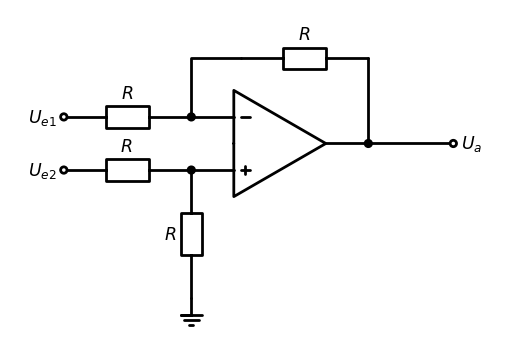

In [57]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('$R$').label('$U_{e1}$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2).dot()
    d.push()
    d += elm.ResistorIEC().down().label('$R$')
    d += elm.Ground()

    d.pop()
    d += elm.ResistorIEC().left().label('$R$').dot(open=True).label('$U_{e2}$', 'L')

#### inv OPV Summierer

$U_a = -(U_{e1} + U_{e2})$

für N-Eingänge gilt:
$U_a = - \Sigma_{i=0}^{N}~U_{ei}$

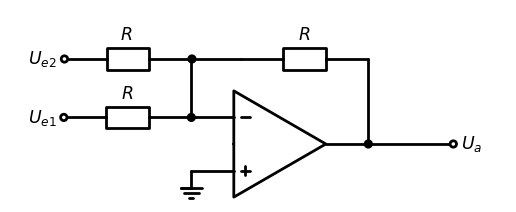

In [58]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('$R$').label('$U_{e1}$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R$')
    d += elm.Line().left().length(1.15).dot()
    d.push()
    d += elm.ResistorIEC().left().dot(open=True).label('$U_{e2}$', 'L').label('$R$')
    d.pop()
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2)
    d += elm.Ground()


## PT $_2$ Element

Zusammen aus 1x IT1-Element in mit Rückkopplung (Schwingungsfähig)  

Zwei PT1-Element (nicht Schwingungsfähig)

### Beschreibung im Frequenz- und Zeitbereich

$G(s) = \frac{k}{1 + \frac{2D}{\omega_n} + s^2\frac{1}{\omega_n^2}}$  



### Kenngrößen

- Überschwingen: Amplitude der ersten Schwingung, wie hoch kommt das Signal überhaupt?
    $ü = $
- Verstärkung: Auf welchen Wert schwingt sich das Signal ein durch die Eingangsspannung
- $\mathcal{T}$: Exponentialkurve über die Amplituden legen, wann erreicht diese Kurve $63%$ des Eingeschwungenen Zustandes ($e^{-1}~\%$ vom Eingeschwungenen Zustand weg)
- T: Periodendauer der Schwingung, mehrere Perioden messen und herunter zuteilen  
- $T_ü$: Zeit bis zum Überschwingungsmaxima (keine ganze Periode bei starker Dämpfung) $T_ü = \frac{T_0}{2}$

### Überschwingen

Wenn sich das Signal auf $1V$ einschwingt und bei der ersten Schwingung auf $1.5V$ raufkommt, so ist $ü=\frac{u_{max}}{k\cdot U_e}$  

Überschwingen ist manchmal gewollt muss jedoch auf die Situation angemessen dimensioniert werden.

### Schwingunsmaxima

Alternative Formel für $ü$  
$ü = e^{-\frac{\pi\cdot D}{\sqrt{1-D^2}}}$

### Identifikation im Zeitbereich

![](mtrs_media/PT2-Bsp1.png)

![](mtrs_media/PT2-Bsp2.png)

### Bedeutung für die Regelungstechnik

- Wichtigste  
- Schwingungsfähig  
- Alles in Richtung PT2  
- Gut Beschrieben  
- Viele Faustregeln

## Nyquist Kriteritum

### Stabilitätsgrenzen

Wenn die Kurve über die die Frequenz auf der Realen und Imaginären Achse gezeichnet wird, so muss die Kurve kleiner 1 sein wenn die Kurve die x-Achse auf der negativen Seite schneidet.

''

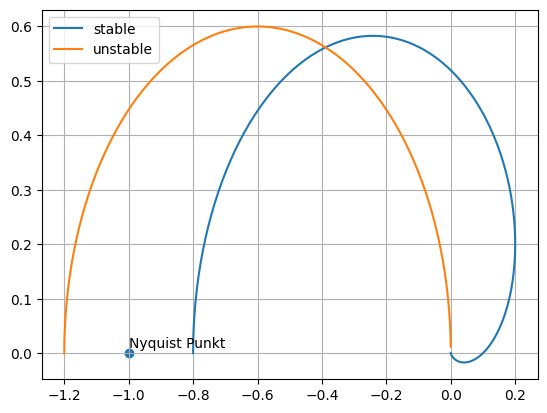

In [59]:
fix, ax = plt.subplots()

w = np.arange(0.0, 100.0, .01)

stable_vs =  -.8/((1+1j*w)**(3))
unstable_vs = -1.2/(1+1j*w)

ax.plot(np.real(stable_vs), np.imag(stable_vs), label="stable")
ax.plot(np.real(unstable_vs), np.imag(unstable_vs), label='unstable')

ax.grid(which='both')
ax.legend()

ax.scatter([-1], [0])
ax.text(-1, .01, 'Nyquist Punkt')
;

### Offener und geschlossener Regelkreis

Für die Anwendung des Kriteritums braucht man - bei uns - den Offenen Regelkreis, 
    die Übertragungsfunktion ist dabei in der Form:  
$G(s) = \frac{F_O(s)}{1 + F_O(s)}$

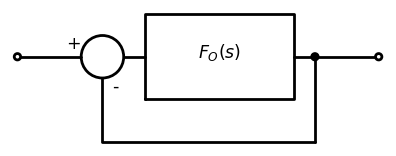

In [60]:
with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True).length(1.5)
    d += (c := dsp.Circle().drop('E').label('+', loc='W', ofst=(0, 0.3)).label('-', loc='S', ofst=(.3, 0)))

    d += create_block('$F_O(s)$')
    d.push()
    d += elm.Line().dot(open=True).idot().length(1.5)
    d.pop()
    d += elm.Line().down().length(2)
    d += elm.Wire("-|").to(c.S)

Elemente welche nicht Teil der Rückkopplung sind werden bei der Stabilitätsprüfung **nicht** mitberücksichtigt!!

### Phasenrand

Bei einer Verstärkung von $1$ wie weit ist man von den 180° ($\pi$) noch weg

- $|F_O(i\omega_D)| = 1$
- $\alpha_R = 180° + arg(F_O(i\omega_D))$

### Amplitudenrand

Bei einer Phasendrehung von $\pi$, welche Abstand hat man zur Verstärkung von $1$

- $arg(F_O(i\omega_r)) = \pi$ 
- $A_R = \frac{1}{|F_O(i\omega_r)|}$

### Faustregeln (Kommt nicht)

Wenn man $30%$ Überschwingen Einstellen will braucht man einen Phasenrand von ca $40°$